The below code is to mount the project or code into drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


To load the dataset.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Hack-O-Mania.xlsx to Hack-O-Mania (1).xlsx


Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

Converting the data of type .xlsx to .csv

In [ ]:
data=pd.read_excel('Dataset.xlsx')
data.to_csv("Dataset.csv")
print(data.head(1))

    area subarea country   c3 interpolated  id    region_wb  \
0  World   World   World  NaN          NaN NaN  All regions   

         incomegroup  year    population  ...       y91      y92       y93  \
0  All income groups  1950  2.536165e+09  ...  11017.54  11752.5  12696.34   

        y94       y95       y96       y97       y98       y99      y100  
0  13839.34  15213.67  16877.18  19097.49  22516.21  28512.81  49393.06  

[1 rows x 252 columns]


Removal of unnecessary attributes

In [ ]:
attributes_to_keep = ['year', 'population' , 'gdp', 'ge0', 'ge1', 'a025', 'a050', 'a075', 'a1','a2','palma' , 's80s20' , 'bottom5', 'bottom20','bottom40','top5','top10','top20', 'gini']
data = data[attributes_to_keep]
data.head(1)

year    population      gdp      ge0     ge1    a025    a050    a075  \
0  1950  2.536165e+09  4031.34  116.633  88.658  21.125  39.933  55.968   

       a1      a2   palma  s80s20  bottom5  bottom20  bottom40    top5  \
0  68.849  93.194  15.721  81.206    0.047     0.664     3.178  33.901   

    top10  top20    gini  
0  49.966  53.92  68.199

Explore the data

In [ ]:
data.shape

(15833, 20)

Understanding the new data

In [ ]:
print(data.dtypes)

year            int64
population    float64
gdp           float64
ge0           float64
ge1           float64
a025          float64
a050          float64
a075          float64
a1            float64
a2            float64
palma         float64
s80s20        float64
bottom5       float64
bottom20      float64
bottom40      float64
top5          float64
top10         float64
top20         float64
gini          float64
dtype: object


Renaming the attributes

In [ ]:
data=data.rename(columns={"ge0":"m-theil",'ge1':'t-theil','s80s20':'ratio_top80bottom20'})
data.head()

year    population      gdp  m-theil  t-theil    a025    a050    a075  \
0  1950  2.536165e+09  4031.34  116.633   88.658  21.125  39.933  55.968   
1  1951  2.583738e+09  4189.22  114.641   88.105  20.984  39.631  55.490   
2  1952  2.630538e+09  4296.13  112.928   87.721  20.875  39.391  55.101   
3  1953  2.677255e+09  4443.39  111.157   86.802  20.689  39.064  54.642   
4  1954  2.724464e+09  4511.39  113.532   87.405  20.856  39.436  55.231   

       a1      a2   palma  ratio_top80bottom20  bottom5  bottom20  bottom40  \
0  68.849  93.194  15.721               81.206    0.047     0.664     3.178   
1  68.222  92.845  15.188               75.488    0.048     0.712     3.286   
2  67.673  91.979  14.725               71.925    0.054     0.750     3.377   
3  67.096  91.411  14.415               68.163    0.063     0.796     3.449   
4  67.868  92.339  15.098               72.823    0.056     0.744     3.284   

     top5   top10   top20    gini  
0  33.901  49.966  53.920  68.199  
1  33.812  49.908  53.784  68.047  
2  33.753  49.724  53.979  67.893  
3  33.702  49.711  54.254  67.720  
4  33.461  49.578  54.190  67.907

Understanding data

In [ ]:
data.describe()

year    population            gdp       m-theil       t-theil  \
count  16046.00000  1.597500e+04   15975.000000  15975.000000  15975.000000   
mean    1985.00000  1.546200e+08   13704.565988     39.797787     40.772154   
std       20.49454  7.311320e+08   19119.362735     24.359801     23.940429   
min     1950.00000  1.490000e+03     284.140000      0.000000      0.000000   
25%     1967.00000  7.888500e+05    2739.990000     21.711000     22.065000   
50%     1985.00000  4.903206e+06    6810.610000     34.765000     36.197000   
75%     2003.00000  1.962607e+07   16322.760000     52.027000     56.121500   
max     2020.00000  7.792308e+09  227110.050000    147.129000    141.544000   

               a025          a050          a075            a1            a2  \
count  15975.000000  15975.000000  15975.000000  15975.000000  15975.000000   
mean       9.699646     17.827584     24.892235     31.109884     50.070641   
std        6.446355      9.839829     12.662312     14.892813     19.627313   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        5.305000     10.339000     15.137000     19.516000     34.618500   
50%        8.527000     16.168000     23.044000     29.352000     48.215000   
75%       12.893000     23.575000     32.764000     40.564000     63.632000   
max       72.358000     73.805000     74.446000     77.037000     95.943000   

              palma  ratio_top80bottom20       bottom5      bottom20  \
count  16006.000000         15936.000000  16013.000000  16008.000000   
mean       3.480095            11.790636      0.972897      5.406981   
std        4.897921            12.758669      3.330506      4.109178   
min        0.250000             1.000000      0.047000      0.200000   
25%        1.467250             5.243750      0.386000      3.406000   
50%        2.360000             7.783000      0.712000      5.167500   
75%        3.862000            12.795750      1.050000      6.932000   
max       69.067000           243.165000     51.729000     59.363000   

           bottom40          top5         top10        top20          gini  
count  16007.000000  16036.000000  16036.000000  16031.00000  15975.000000  
mean      14.832675     23.767136     35.063920     39.84026     44.518932  
std        6.131819      8.506049     10.009143      5.82909     12.009791  
min        0.400000      0.050000      0.100000      0.20000      0.000000  
25%       10.803000     16.781500     26.980000     36.17900     35.415000  
50%       14.645000     22.500000     34.065500     40.15300     44.484000  
75%       18.705000     29.555750     42.254000     43.13250     53.153000  
max       65.599000     54.749000     68.774000     80.82000     77.085000

Identifying null values

In [ ]:
data.isnull().sum()

year                     0
population              71
gdp                     71
m-theil                 71
t-theil                 71
a025                    71
a050                    71
a075                    71
a1                      71
a2                      71
palma                   40
ratio_top80bottom20    110
bottom5                 33
bottom20                38
bottom40                39
top5                    10
top10                   10
top20                   15
gini                    71
dtype: int64

Dropping null values

In [ ]:
data=data.dropna()

In [ ]:
data.isnull().sum()

year                   0
population             0
gdp                    0
m-theil                0
t-theil                0
a025                   0
a050                   0
a075                   0
a1                     0
a2                     0
palma                  0
ratio_top80bottom20    0
bottom5                0
bottom20               0
bottom40               0
top5                   0
top10                  0
top20                  0
gini                   0
dtype: int64

Size of dataset after removing null values

In [ ]:
data.shape

(15833, 19)

Correlation analysis

1)Univariate analysis

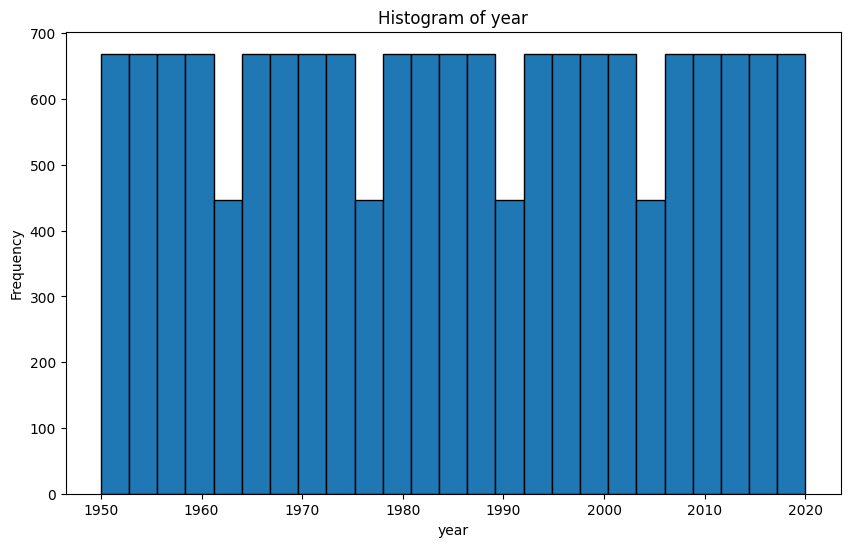

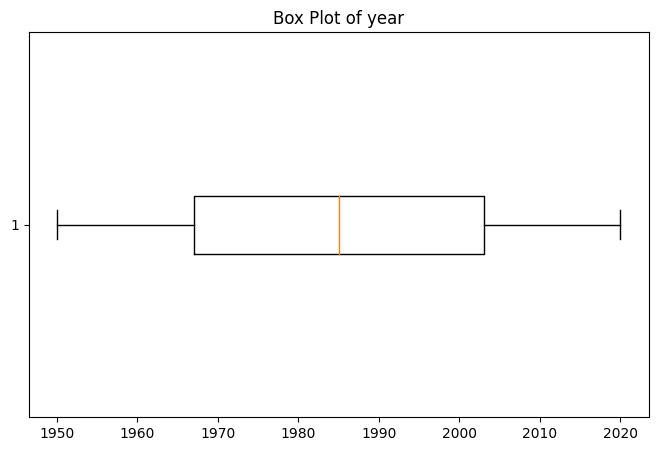

Mean: 1985.0
Median: 1985.0
Standard Deviation: 20.49454875204069

Frequency Distribution:
 1950    223
1995    223
2001    223
2000    223
1999    223
       ... 
1973    223
1972    223
1971    223
1970    223
2020    223
Name: year, Length: 71, dtype: int64

Skewness: 0.0
Kurtosis: -1.2004763313126612


In [ ]:
column_name = 'year'

mean_value = data[column_name].mean()
median_value = data[column_name].median()
std_dev = data[column_name].std()

# Frequency Distribution
frequency_distribution = data[column_name].value_counts()

# Visualization - Histogram
plt.figure(figsize=(10, 6))
plt.hist(data[column_name], bins='auto', edgecolor='black')
plt.title('Histogram of {}'.format(column_name))
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

# Visualization - Box Plot
plt.figure(figsize=(8, 5))
plt.boxplot(data[column_name], vert=False)
plt.title('Box Plot of {}'.format(column_name))
plt.show()

# Measures of Shape
skewness = data[column_name].skew()
kurtosis = data[column_name].kurtosis()

# Display Summary Statistics
print("Mean:", mean_value)
print("Median:", median_value)
print("Standard Deviation:", std_dev)
print("\nFrequency Distribution:\n", frequency_distribution)
print("\nSkewness:", skewness)
print("Kurtosis:", kurtosis)


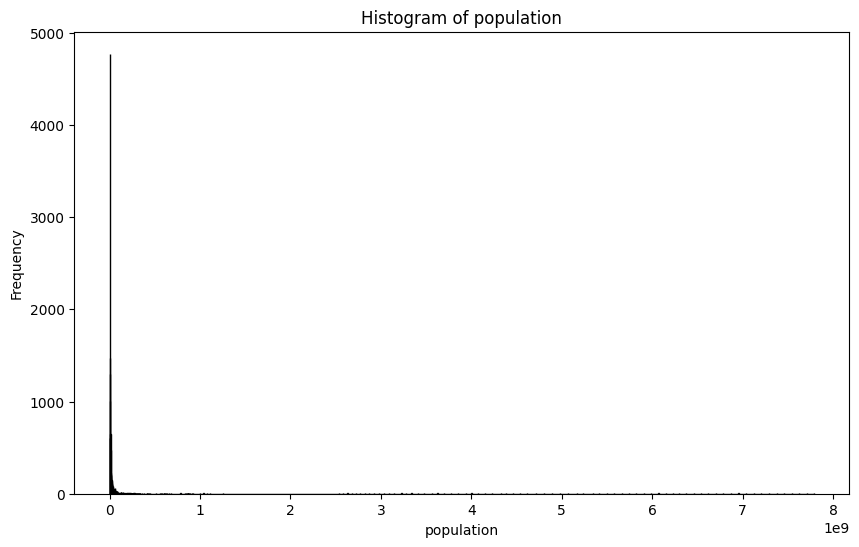

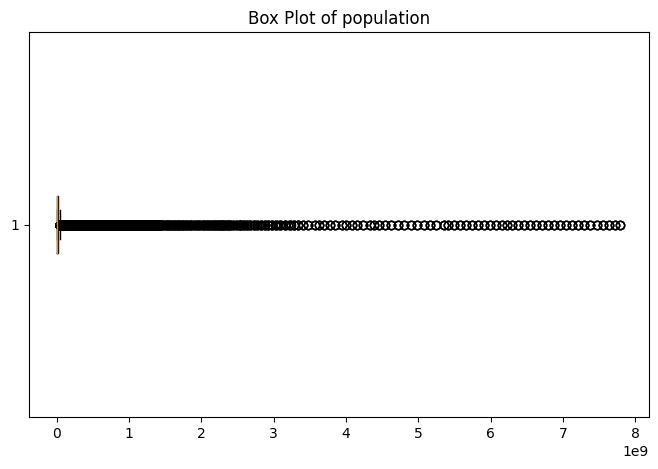

Mean: 133640260.67597853
Median: 4799435.0
Standard Deviation: 650683215.5283476

Frequency Distribution:
 9.470000e+05    11
1.248260e+05    11
2.536165e+09     3
5.823783e+09     3
6.299933e+09     3
                ..
6.510320e+05     1
6.682810e+05     1
6.854970e+05     1
7.004780e+05     1
1.486293e+07     1
Name: population, Length: 15647, dtype: int64

Skewness: 7.733152420990157
Kurtosis: 67.75041172706263


In [ ]:
column_name = 'population'

# Descriptive Statistics
mean_value = data[column_name].mean()
median_value = data[column_name].median()
std_dev = data[column_name].std()

# Frequency Distribution
frequency_distribution = data[column_name].value_counts()

# Visualization - Histogram
plt.figure(figsize=(10, 6))
plt.hist(data[column_name], bins='auto', edgecolor='black')
plt.title('Histogram of {}'.format(column_name))
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

# Visualization - Box Plot
plt.figure(figsize=(8, 5))
plt.boxplot(data[column_name], vert=False)
plt.title('Box Plot of {}'.format(column_name))
plt.show()

# Measures of Shape
skewness = data[column_name].skew()
kurtosis = data[column_name].kurtosis()

# Display Summary Statistics
print("Mean:", mean_value)
print("Median:", median_value)
print("Standard Deviation:", std_dev)
print("\nFrequency Distribution:\n", frequency_distribution)
print("\nSkewness:", skewness)
print("Kurtosis:", kurtosis)


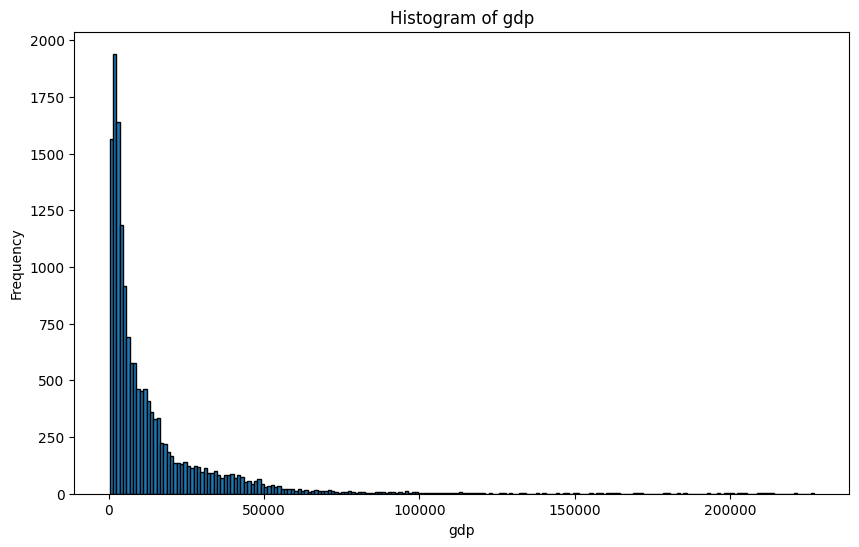

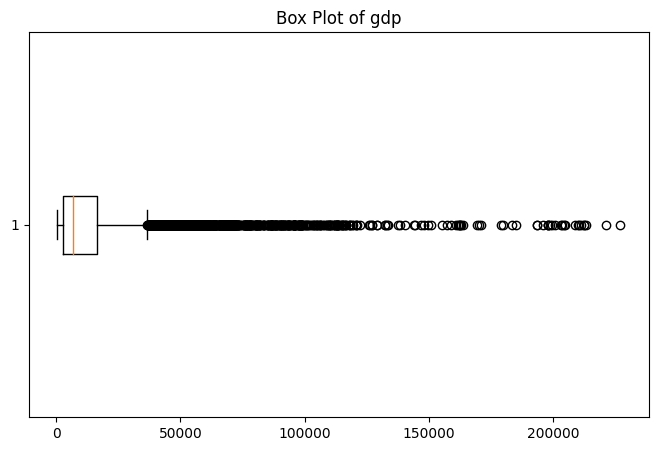

Mean: 13715.457890481906
Median: 6706.03
Standard Deviation: 19199.922497297655

Frequency Distribution:
 3028.73     21
2024.25     11
11227.84    11
801.38       4
1947.03      4
            ..
7249.32      1
7472.81      1
7696.31      1
7929.31      1
3353.41      1
Name: gdp, Length: 15092, dtype: int64

Skewness: 3.829792989590637
Kurtosis: 23.618990100737545


In [ ]:
column_name = 'gdp'

# Descriptive Statistics
mean_value = data[column_name].mean()
median_value = data[column_name].median()
std_dev = data[column_name].std()

# Frequency Distribution
frequency_distribution = data[column_name].value_counts()

# Visualization - Histogram
plt.figure(figsize=(10, 6))
plt.hist(data[column_name], bins='auto', edgecolor='black')
plt.title('Histogram of {}'.format(column_name))
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

# Visualization - Box Plot
plt.figure(figsize=(8, 5))
plt.boxplot(data[column_name], vert=False)
plt.title('Box Plot of {}'.format(column_name))
plt.show()

# Measures of Shape
skewness = data[column_name].skew()
kurtosis = data[column_name].kurtosis()

# Display Summary Statistics
print("Mean:", mean_value)
print("Median:", median_value)
print("Standard Deviation:", std_dev)
print("\nFrequency Distribution:\n", frequency_distribution)
print("\nSkewness:", skewness)
print("Kurtosis:", kurtosis)

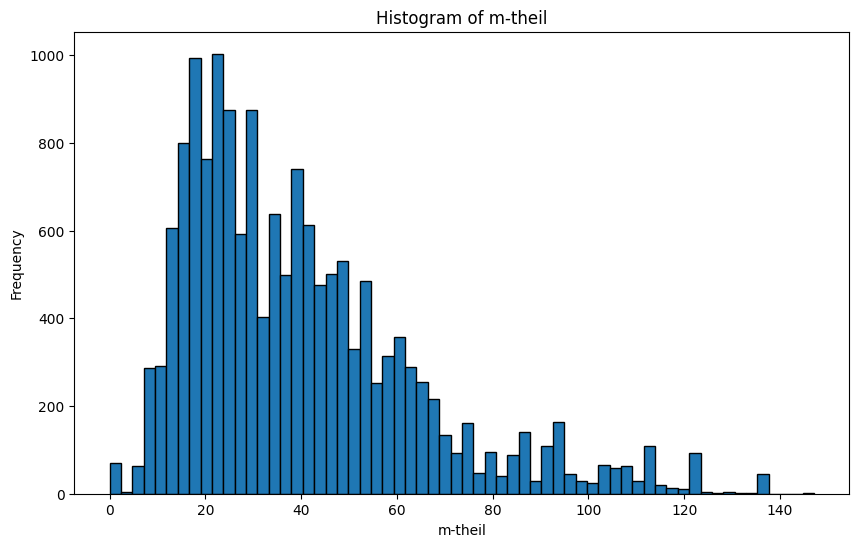

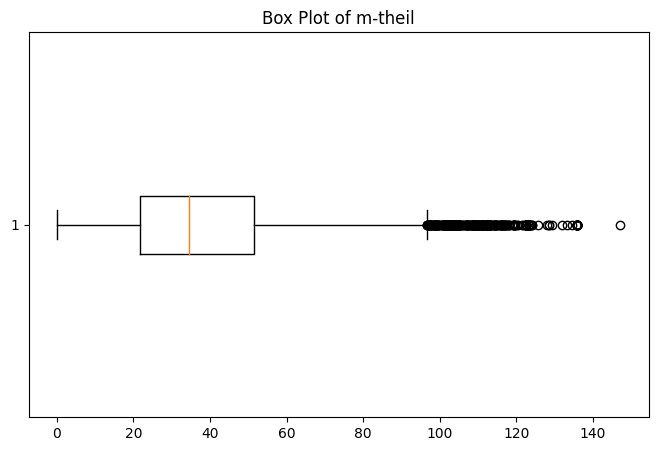

Mean: 39.70750925282638
Median: 34.589
Standard Deviation: 24.398906426214168

Frequency Distribution:
 17.580    98
39.413    71
39.818    71
53.110    71
66.637    71
          ..
19.922     1
20.344     1
20.774     1
21.211     1
40.327     1
Name: m-theil, Length: 7513, dtype: int64

Skewness: 1.255883198905792
Kurtosis: 1.5833148176486622


In [ ]:
column_name = 'm-theil'

# Descriptive Statistics
mean_value = data[column_name].mean()
median_value = data[column_name].median()
std_dev = data[column_name].std()

# Frequency Distribution
frequency_distribution = data[column_name].value_counts()

# Visualization - Histogram
plt.figure(figsize=(10, 6))
plt.hist(data[column_name], bins='auto', edgecolor='black')
plt.title('Histogram of {}'.format(column_name))
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

# Visualization - Box Plot
plt.figure(figsize=(8, 5))
plt.boxplot(data[column_name], vert=False)
plt.title('Box Plot of {}'.format(column_name))
plt.show()

# Measures of Shape
skewness = data[column_name].skew()
kurtosis = data[column_name].kurtosis()

# Display Summary Statistics
print("Mean:", mean_value)
print("Median:", median_value)
print("Standard Deviation:", std_dev)
print("\nFrequency Distribution:\n", frequency_distribution)
print("\nSkewness:", skewness)
print("Kurtosis:", kurtosis)

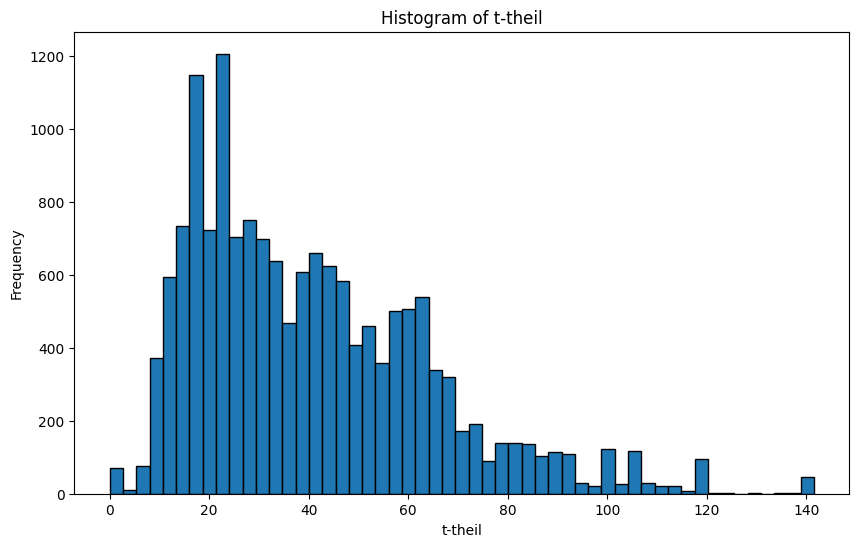

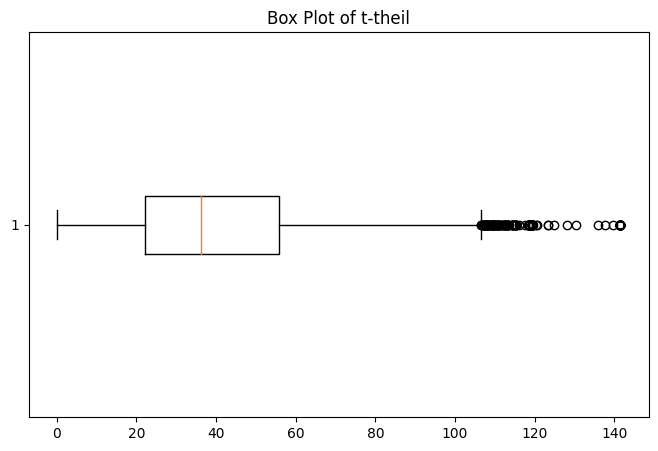

Mean: 40.69738602917956
Median: 36.197
Standard Deviation: 23.99432612420668

Frequency Distribution:
 17.661    98
24.016    72
22.065    71
58.060    71
58.081    71
          ..
23.041     1
23.466     1
23.895     1
24.329     1
42.382     1
Name: t-theil, Length: 7554, dtype: int64

Skewness: 1.0286397290234608
Kurtosis: 1.0652113974418116


In [ ]:
column_name = 't-theil'

# Descriptive Statistics
mean_value = data[column_name].mean()
median_value = data[column_name].median()
std_dev = data[column_name].std()

# Frequency Distribution
frequency_distribution = data[column_name].value_counts()

# Visualization - Histogram
plt.figure(figsize=(10, 6))
plt.hist(data[column_name], bins='auto', edgecolor='black')
plt.title('Histogram of {}'.format(column_name))
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

# Visualization - Box Plot
plt.figure(figsize=(8, 5))
plt.boxplot(data[column_name], vert=False)
plt.title('Box Plot of {}'.format(column_name))
plt.show()

# Measures of Shape
skewness = data[column_name].skew()
kurtosis = data[column_name].kurtosis()

# Display Summary Statistics
print("Mean:", mean_value)
print("Median:", median_value)
print("Standard Deviation:", std_dev)
print("\nFrequency Distribution:\n", frequency_distribution)
print("\nSkewness:", skewness)
print("Kurtosis:", kurtosis)

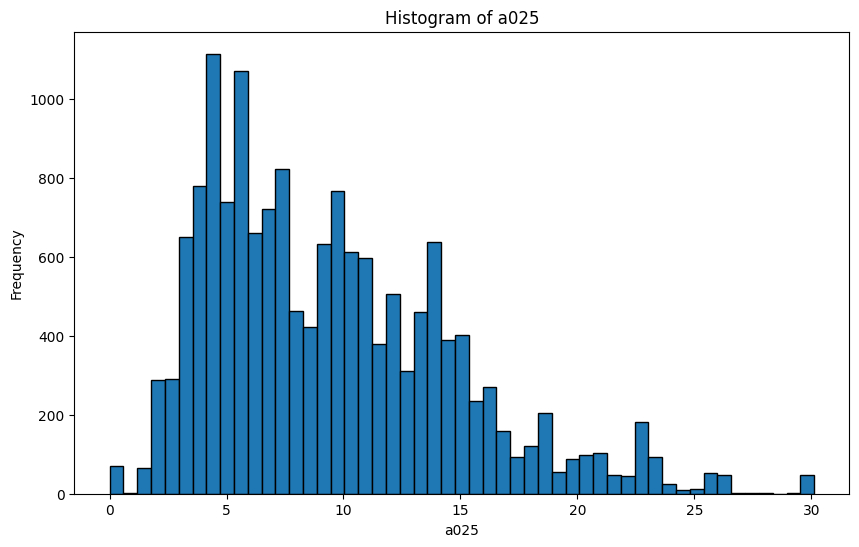

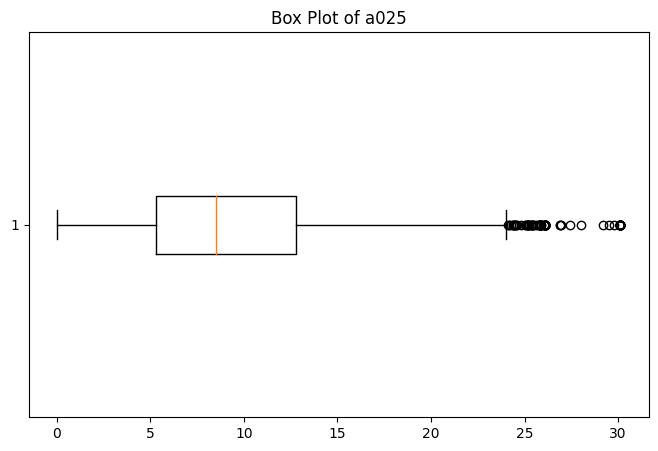

Mean: 9.457366197183099
Median: 8.527000000000001
Standard Deviation: 5.282385900133342

Frequency Distribution:
 4.299     164
13.839     72
10.513     72
9.842      71
13.301     71
         ... 
10.184      1
9.921       1
10.765      1
10.312      1
14.132      1
Name: a025, Length: 6303, dtype: int64

Skewness: 0.9146960216123571
Kurtosis: 0.6601630680830608


In [ ]:
column_name = 'a025'

# Descriptive Statistics
mean_value = data[column_name].mean()
median_value = data[column_name].median()
std_dev = data[column_name].std()

# Frequency Distribution
frequency_distribution = data[column_name].value_counts()

# Visualization - Histogram
plt.figure(figsize=(10, 6))
plt.hist(data[column_name], bins='auto', edgecolor='black')
plt.title('Histogram of {}'.format(column_name))
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

# Visualization - Box Plot
plt.figure(figsize=(8, 5))
plt.boxplot(data[column_name], vert=False)
plt.title('Box Plot of {}'.format(column_name))
plt.show()

# Measures of Shape
skewness = data[column_name].skew()
kurtosis = data[column_name].kurtosis()

# Display Summary Statistics
print("Mean:", mean_value)
print("Median:", median_value)
print("Standard Deviation:", std_dev)
print("\nFrequency Distribution:\n", frequency_distribution)
print("\nSkewness:", skewness)
print("Kurtosis:", kurtosis)

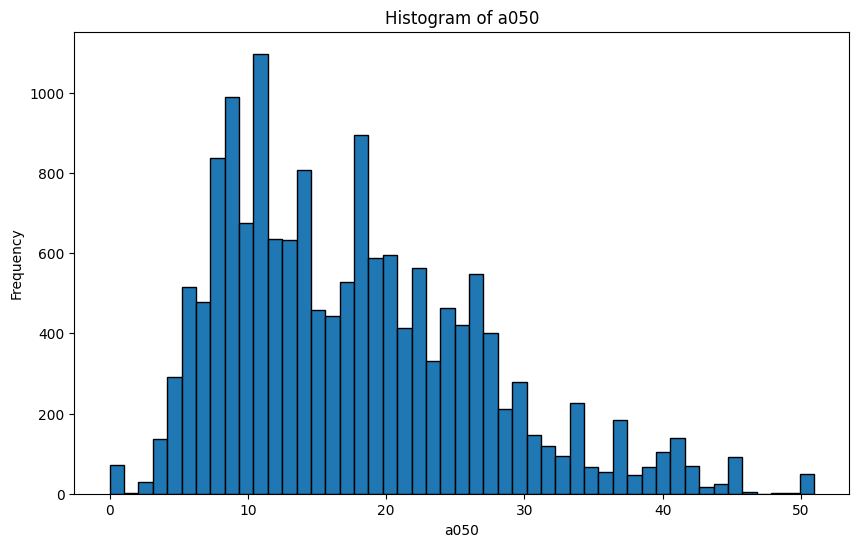

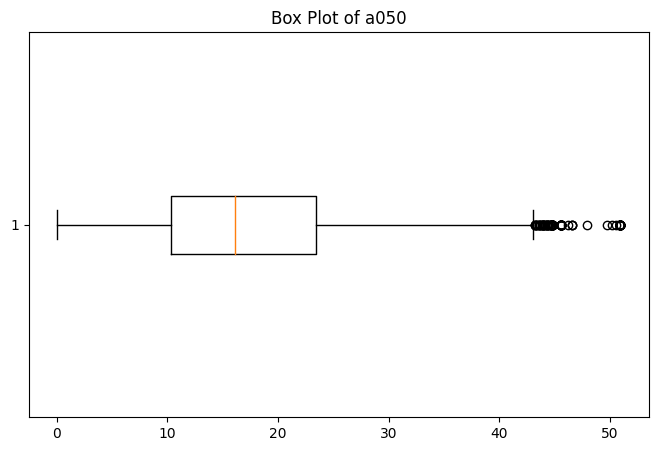

Mean: 17.618570138318702
Median: 16.081
Standard Deviation: 9.313498782758836

Frequency Distribution:
 8.393     98
14.334    80
18.439    71
10.060    71
26.459    71
          ..
10.099     1
10.291     1
10.484     1
10.878     1
8.728      1
Name: a050, Length: 6988, dtype: int64

Skewness: 0.8051396662288632
Kurtosis: 0.31345111189957153


In [ ]:
column_name = 'a050'

# Descriptive Statistics
mean_value = data[column_name].mean()
median_value = data[column_name].median()
std_dev = data[column_name].std()

# Frequency Distribution
frequency_distribution = data[column_name].value_counts()

# Visualization - Histogram
plt.figure(figsize=(10, 6))
plt.hist(data[column_name], bins='auto', edgecolor='black')
plt.title('Histogram of {}'.format(column_name))
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

# Visualization - Box Plot
plt.figure(figsize=(8, 5))
plt.boxplot(data[column_name], vert=False)
plt.title('Box Plot of {}'.format(column_name))
plt.show()

# Measures of Shape
skewness = data[column_name].skew()
kurtosis = data[column_name].kurtosis()

# Display Summary Statistics
print("Mean:", mean_value)
print("Median:", median_value)
print("Standard Deviation:", std_dev)
print("\nFrequency Distribution:\n", frequency_distribution)
print("\nSkewness:", skewness)
print("Kurtosis:", kurtosis)

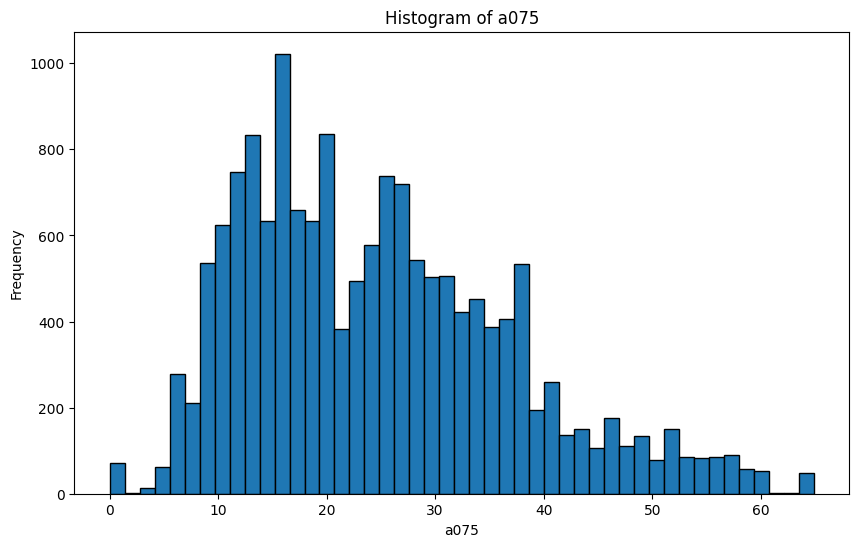

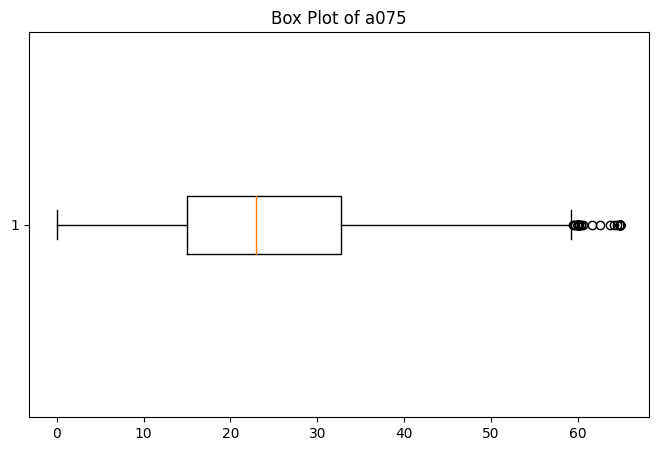

Mean: 24.713553274805786
Median: 22.894000000000002
Standard Deviation: 12.383851780137405

Frequency Distribution:
 12.321    99
38.330    77
16.595    72
20.166    72
36.528    71
          ..
20.455     1
18.776     1
21.203     1
22.005     1
4.243      1
Name: a075, Length: 7208, dtype: int64

Skewness: 0.7073661590881283
Kurtosis: 0.051095202917997184


In [ ]:
column_name = 'a075'

# Descriptive Statistics
mean_value = data[column_name].mean()
median_value = data[column_name].median()
std_dev = data[column_name].std()

# Frequency Distribution
frequency_distribution = data[column_name].value_counts()

# Visualization - Histogram
plt.figure(figsize=(10, 6))
plt.hist(data[column_name], bins='auto', edgecolor='black')
plt.title('Histogram of {}'.format(column_name))
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

# Visualization - Box Plot
plt.figure(figsize=(8, 5))
plt.boxplot(data[column_name], vert=False)
plt.title('Box Plot of {}'.format(column_name))
plt.show()

# Measures of Shape
skewness = data[column_name].skew()
kurtosis = data[column_name].kurtosis()

# Display Summary Statistics
print("Mean:", mean_value)
print("Median:", median_value)
print("Standard Deviation:", std_dev)
print("\nFrequency Distribution:\n", frequency_distribution)
print("\nSkewness:", skewness)
print("Kurtosis:", kurtosis)

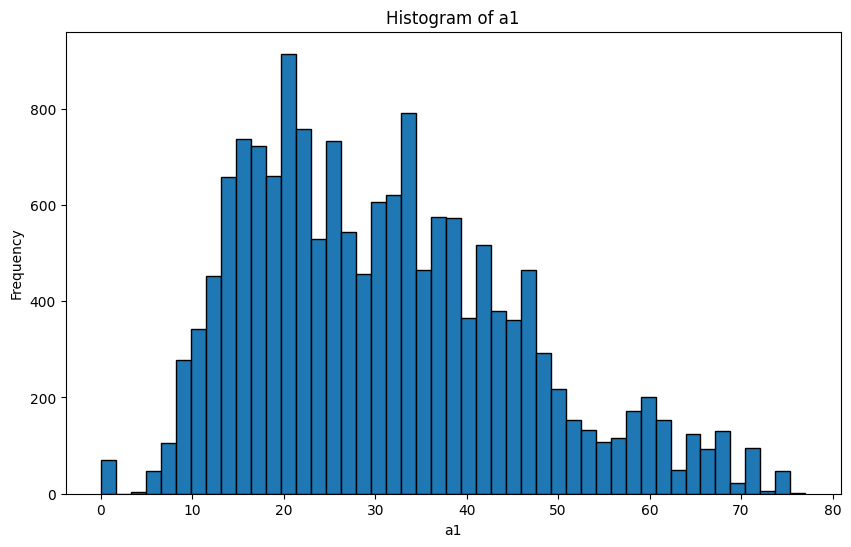

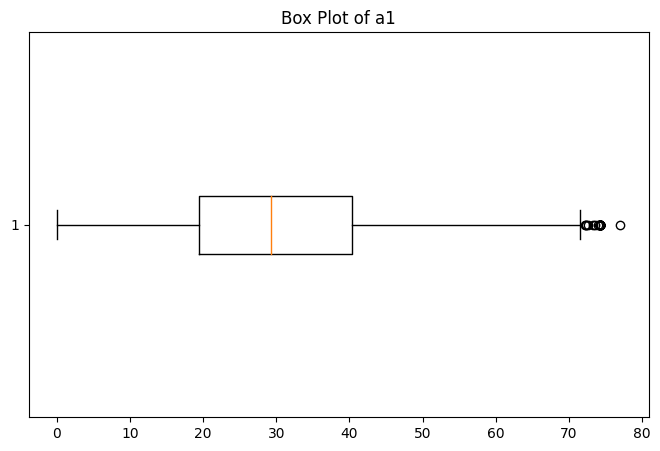

Mean: 30.96028093223015
Median: 29.256
Standard Deviation: 14.74960768712952

Frequency Distribution:
 16.121    98
32.573    72
41.204    71
32.846    71
48.643    71
          ..
30.146     1
29.623     1
29.113     1
28.617     1
37.488     1
Name: a1, Length: 7357, dtype: int64

Skewness: 0.6224308133591663
Kurtosis: -0.13528516582258687


In [ ]:
column_name = 'a1'

# Descriptive Statistics
mean_value = data[column_name].mean()
median_value = data[column_name].median()
std_dev = data[column_name].std()

# Frequency Distribution
frequency_distribution = data[column_name].value_counts()

# Visualization - Histogram
plt.figure(figsize=(10, 6))
plt.hist(data[column_name], bins='auto', edgecolor='black')
plt.title('Histogram of {}'.format(column_name))
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

# Visualization - Box Plot
plt.figure(figsize=(8, 5))
plt.boxplot(data[column_name], vert=False)
plt.title('Box Plot of {}'.format(column_name))
plt.show()

# Measures of Shape
skewness = data[column_name].skew()
kurtosis = data[column_name].kurtosis()

# Display Summary Statistics
print("Mean:", mean_value)
print("Median:", median_value)
print("Standard Deviation:", std_dev)
print("\nFrequency Distribution:\n", frequency_distribution)
print("\nSkewness:", skewness)
print("Kurtosis:", kurtosis)

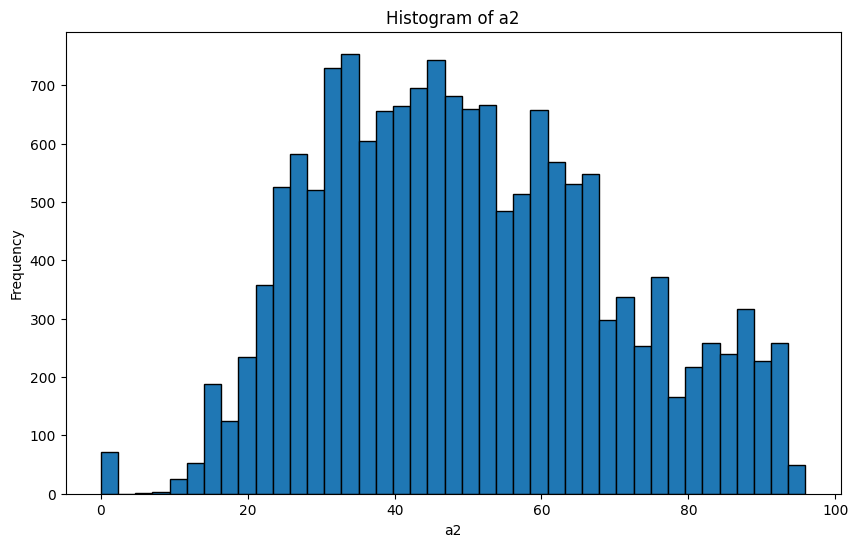

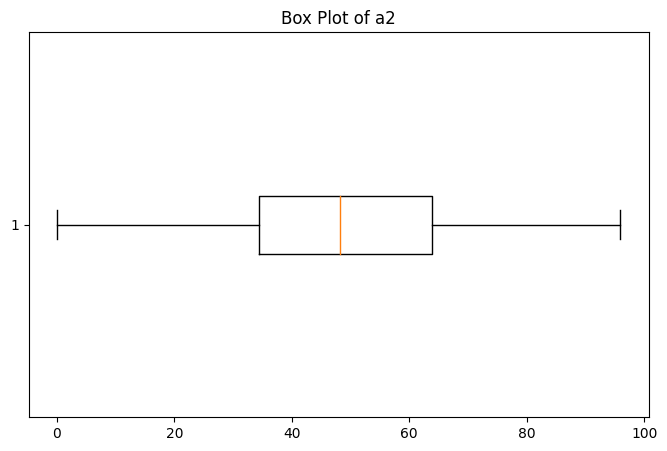

Mean: 50.04483951241079
Median: 48.215
Standard Deviation: 19.702364868830664

Frequency Distribution:
 30.570    98
79.693    71
41.816    71
0.000     71
61.481    71
          ..
58.651     1
57.353     1
56.115     1
54.932     1
65.507     1
Name: a2, Length: 7531, dtype: int64

Skewness: 0.29006707697582695
Kurtosis: -0.5959568018388155


In [ ]:
column_name = 'a2'

# Descriptive Statistics
mean_value = data[column_name].mean()
median_value = data[column_name].median()
std_dev = data[column_name].std()

# Frequency Distribution
frequency_distribution = data[column_name].value_counts()

# Visualization - Histogram
plt.figure(figsize=(10, 6))
plt.hist(data[column_name], bins='auto', edgecolor='black')
plt.title('Histogram of {}'.format(column_name))
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

# Visualization - Box Plot
plt.figure(figsize=(8, 5))
plt.boxplot(data[column_name], vert=False)
plt.title('Box Plot of {}'.format(column_name))
plt.show()

# Measures of Shape
skewness = data[column_name].skew()
kurtosis = data[column_name].kurtosis()

# Display Summary Statistics
print("Mean:", mean_value)
print("Median:", median_value)
print("Standard Deviation:", std_dev)
print("\nFrequency Distribution:\n", frequency_distribution)
print("\nSkewness:", skewness)
print("Kurtosis:", kurtosis)

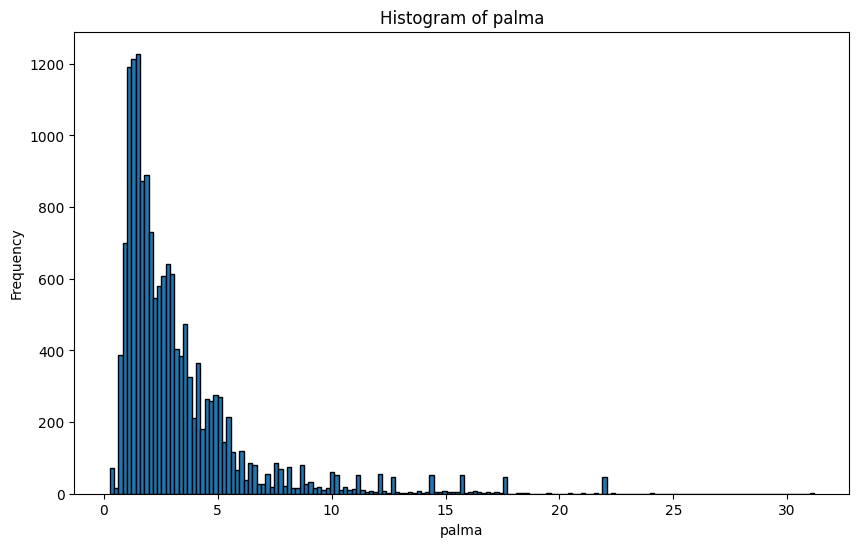

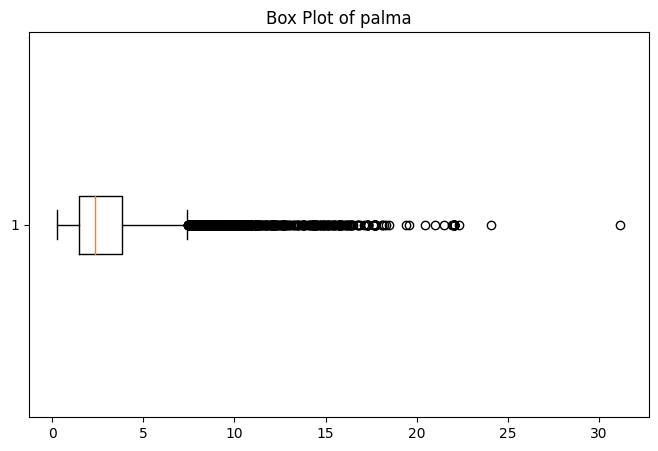

Mean: 3.221377502684267
Median: 2.348
Standard Deviation: 2.8914632959289923

Frequency Distribution:
 1.210    100
0.778     79
1.437     79
1.523     79
2.011     75
        ... 
5.494      1
5.681      1
5.880      1
4.619      1
5.036      1
Name: palma, Length: 4215, dtype: int64

Skewness: 2.897440927316303
Kurtosis: 11.271260747088238


In [ ]:
column_name = 'palma'

# Descriptive Statistics
mean_value = data[column_name].mean()
median_value = data[column_name].median()
std_dev = data[column_name].std()

# Frequency Distribution
frequency_distribution = data[column_name].value_counts()

# Visualization - Histogram
plt.figure(figsize=(10, 6))
plt.hist(data[column_name], bins='auto', edgecolor='black')
plt.title('Histogram of {}'.format(column_name))
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

# Visualization - Box Plot
plt.figure(figsize=(8, 5))
plt.boxplot(data[column_name], vert=False)
plt.title('Box Plot of {}'.format(column_name))
plt.show()

# Measures of Shape
skewness = data[column_name].skew()
kurtosis = data[column_name].kurtosis()

# Display Summary Statistics
print("Mean:", mean_value)
print("Median:", median_value)
print("Standard Deviation:", std_dev)
print("\nFrequency Distribution:\n", frequency_distribution)
print("\nSkewness:", skewness)
print("Kurtosis:", kurtosis)

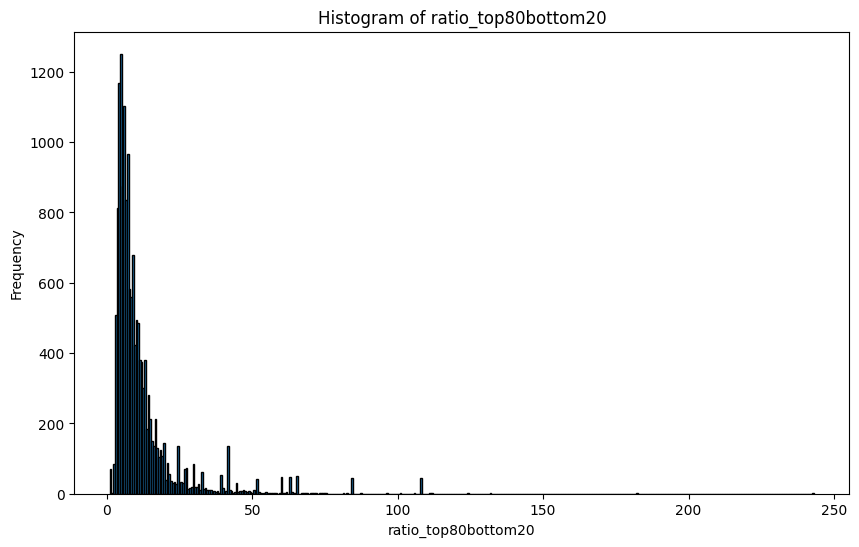

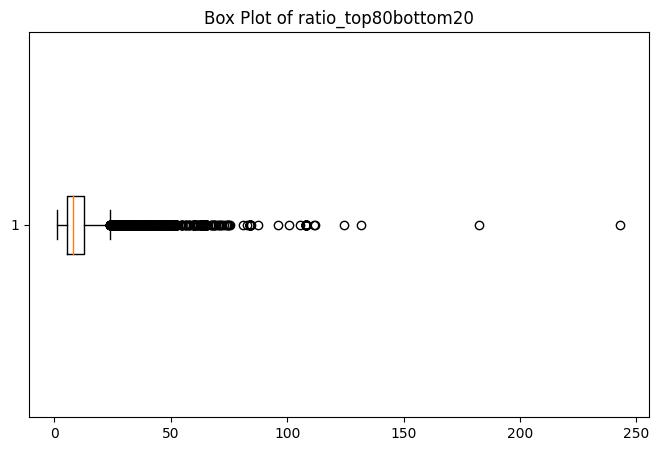

Mean: 11.569723173119435
Median: 7.768
Standard Deviation: 12.319515292039808

Frequency Distribution:
 4.507     98
6.822     75
6.179     72
24.430    71
9.151     71
          ..
4.609      1
4.859      1
5.076      1
5.200      1
81.206     1
Name: ratio_top80bottom20, Length: 6307, dtype: int64

Skewness: 4.261360206653541
Kurtosis: 28.946593686920703


In [ ]:
column_name = 'ratio_top80bottom20'

# Descriptive Statistics
mean_value = data[column_name].mean()
median_value = data[column_name].median()
std_dev = data[column_name].std()

# Frequency Distribution
frequency_distribution = data[column_name].value_counts()

# Visualization - Histogram
plt.figure(figsize=(10, 6))
plt.hist(data[column_name], bins='auto', edgecolor='black')
plt.title('Histogram of {}'.format(column_name))
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

# Visualization - Box Plot
plt.figure(figsize=(8, 5))
plt.boxplot(data[column_name], vert=False)
plt.title('Box Plot of {}'.format(column_name))
plt.show()

# Measures of Shape
skewness = data[column_name].skew()
kurtosis = data[column_name].kurtosis()

# Display Summary Statistics
print("Mean:", mean_value)
print("Median:", median_value)
print("Standard Deviation:", std_dev)
print("\nFrequency Distribution:\n", frequency_distribution)
print("\nSkewness:", skewness)
print("Kurtosis:", kurtosis)

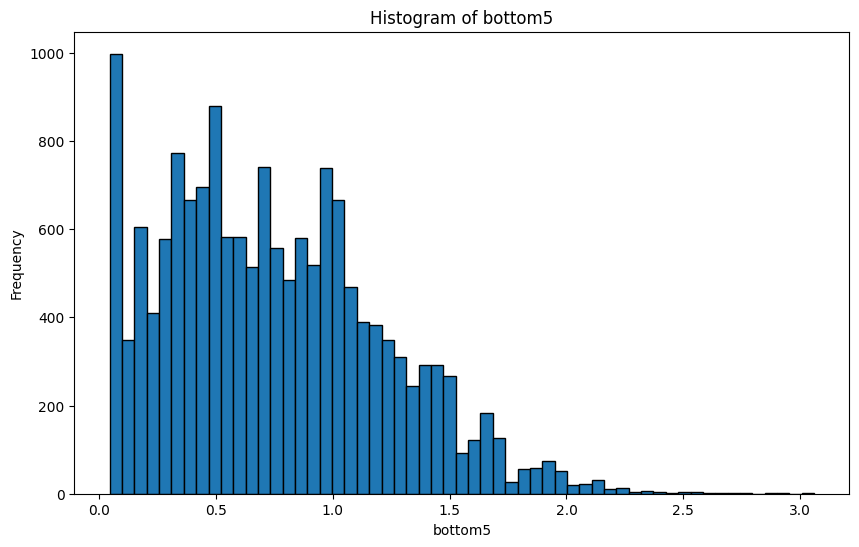

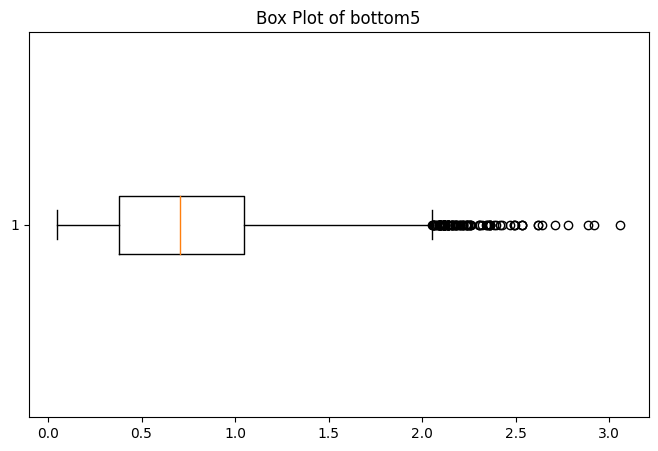

Mean: 0.7522309101244237
Median: 0.7030000000000001
Standard Deviation: 0.46481360166969804

Frequency Distribution:
 0.050    469
0.060    141
1.501    117
0.732    103
1.049    100
        ... 
1.209      1
1.303      1
1.399      1
1.447      1
1.030      1
Name: bottom5, Length: 1721, dtype: int64

Skewness: 0.5781380209220266
Kurtosis: -0.04641662702007343


In [ ]:
column_name = 'bottom5'

# Descriptive Statistics
mean_value = data[column_name].mean()
median_value = data[column_name].median()
std_dev = data[column_name].std()

# Frequency Distribution
frequency_distribution = data[column_name].value_counts()

# Visualization - Histogram
plt.figure(figsize=(10, 6))
plt.hist(data[column_name], bins='auto', edgecolor='black')
plt.title('Histogram of {}'.format(column_name))
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

# Visualization - Box Plot
plt.figure(figsize=(8, 5))
plt.boxplot(data[column_name], vert=False)
plt.title('Box Plot of {}'.format(column_name))
plt.show()

# Measures of Shape
skewness = data[column_name].skew()
kurtosis = data[column_name].kurtosis()

# Display Summary Statistics
print("Mean:", mean_value)
print("Median:", median_value)
print("Standard Deviation:", std_dev)
print("\nFrequency Distribution:\n", frequency_distribution)
print("\nSkewness:", skewness)
print("Kurtosis:", kurtosis)

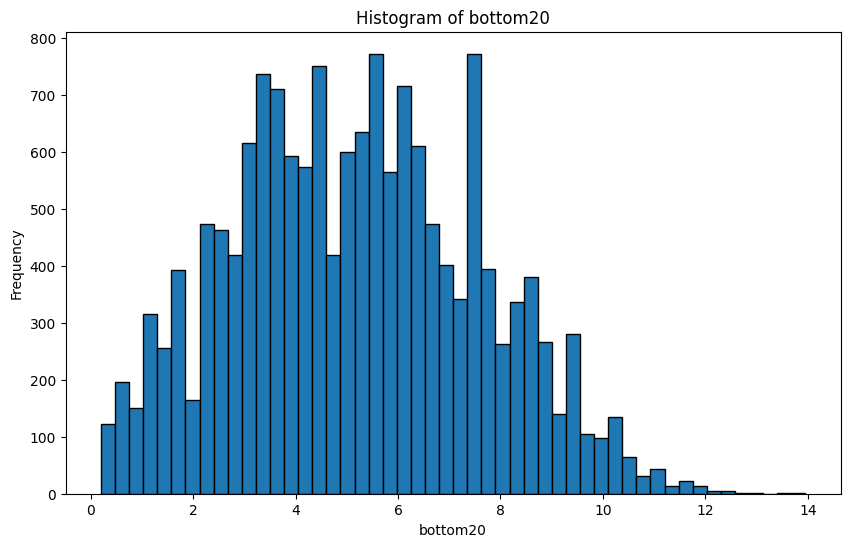

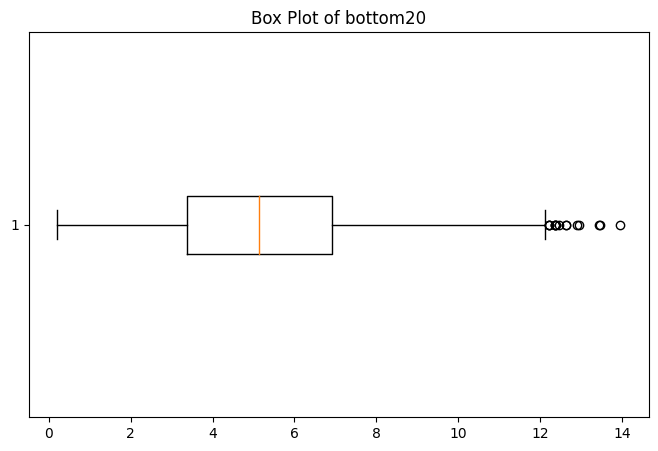

Mean: 5.181478367965642
Median: 5.131
Standard Deviation: 2.4028026721321125

Frequency Distribution:
 7.604    98
5.741    75
5.096    72
3.382    72
6.175    72
         ..
9.275     1
9.322     1
9.403     1
9.363     1
2.939     1
Name: bottom20, Length: 5156, dtype: int64

Skewness: 0.19021920453756144
Kurtosis: -0.5520199415655438


In [ ]:
column_name = 'bottom20'

# Descriptive Statistics
mean_value = data[column_name].mean()
median_value = data[column_name].median()
std_dev = data[column_name].std()

# Frequency Distribution
frequency_distribution = data[column_name].value_counts()

# Visualization - Histogram
plt.figure(figsize=(10, 6))
plt.hist(data[column_name], bins='auto', edgecolor='black')
plt.title('Histogram of {}'.format(column_name))
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

# Visualization - Box Plot
plt.figure(figsize=(8, 5))
plt.boxplot(data[column_name], vert=False)
plt.title('Box Plot of {}'.format(column_name))
plt.show()

# Measures of Shape
skewness = data[column_name].skew()
kurtosis = data[column_name].kurtosis()

# Display Summary Statistics
print("Mean:", mean_value)
print("Median:", median_value)
print("Standard Deviation:", std_dev)
print("\nFrequency Distribution:\n", frequency_distribution)
print("\nSkewness:", skewness)
print("Kurtosis:", kurtosis)

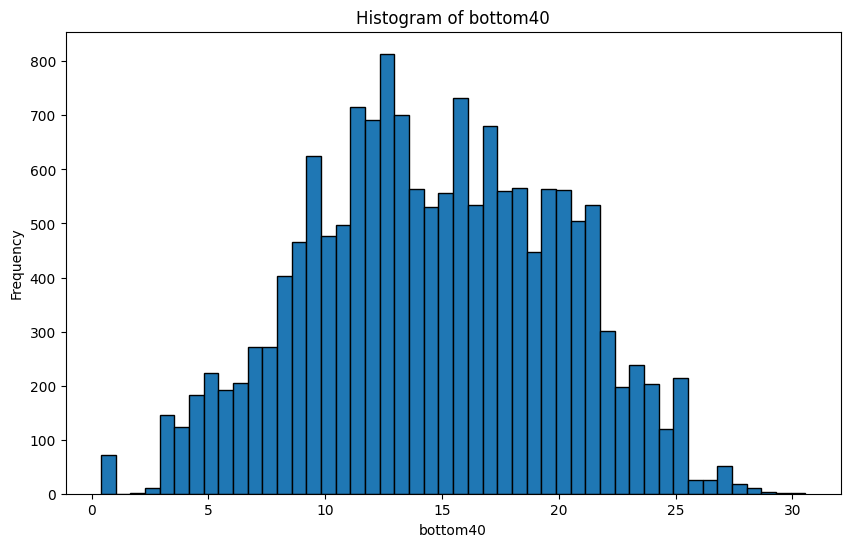

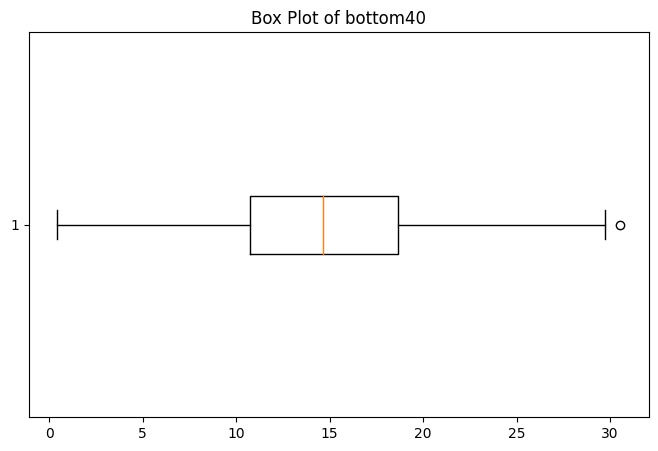

Mean: 14.624605696962043
Median: 14.625
Standard Deviation: 5.346475109804388

Frequency Distribution:
 20.653    98
12.721    80
10.385    72
13.425    72
19.778    72
          ..
7.907      1
7.837      1
7.767      1
7.697      1
3.178      1
Name: bottom40, Length: 6465, dtype: int64

Skewness: -0.038976060818310614
Kurtosis: -0.5649340503582887


In [ ]:
column_name = 'bottom40'

# Descriptive Statistics
mean_value = data[column_name].mean()
median_value = data[column_name].median()
std_dev = data[column_name].std()

# Frequency Distribution
frequency_distribution = data[column_name].value_counts()

# Visualization - Histogram
plt.figure(figsize=(10, 6))
plt.hist(data[column_name], bins='auto', edgecolor='black')
plt.title('Histogram of {}'.format(column_name))
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

# Visualization - Box Plot
plt.figure(figsize=(8, 5))
plt.boxplot(data[column_name], vert=False)
plt.title('Box Plot of {}'.format(column_name))
plt.show()

# Measures of Shape
skewness = data[column_name].skew()
kurtosis = data[column_name].kurtosis()

# Display Summary Statistics
print("Mean:", mean_value)
print("Median:", median_value)
print("Standard Deviation:", std_dev)
print("\nFrequency Distribution:\n", frequency_distribution)
print("\nSkewness:", skewness)
print("Kurtosis:", kurtosis)

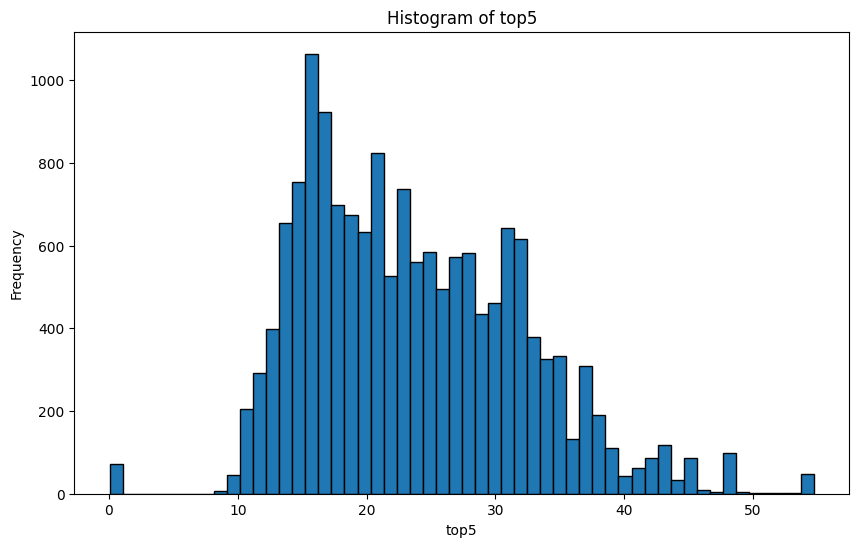

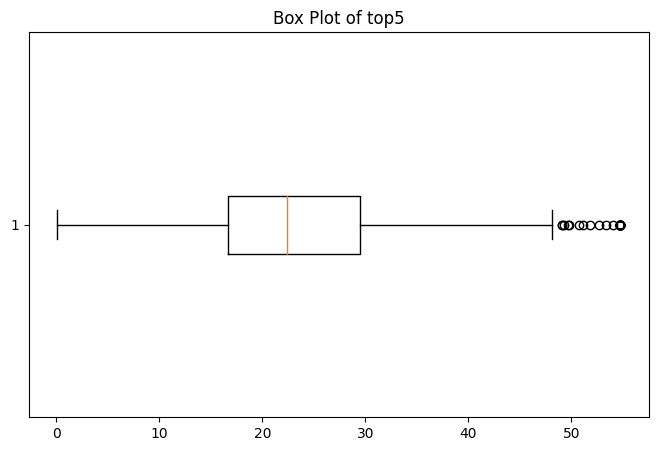

Mean: 23.672227310048633
Median: 22.418
Standard Deviation: 8.412852447385037

Frequency Distribution:
 15.697    103
30.945     93
30.535     73
21.920     72
18.172     72
         ... 
30.761      1
30.825      1
30.890      1
30.508      1
33.901      1
Name: top5, Length: 6840, dtype: int64

Skewness: 0.5782534390521085
Kurtosis: 0.20097662724255416


In [ ]:
column_name = 'top5'

# Descriptive Statistics
mean_value = data[column_name].mean()
median_value = data[column_name].median()
std_dev = data[column_name].std()

# Frequency Distribution
frequency_distribution = data[column_name].value_counts()

# Visualization - Histogram
plt.figure(figsize=(10, 6))
plt.hist(data[column_name], bins='auto', edgecolor='black')
plt.title('Histogram of {}'.format(column_name))
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

# Visualization - Box Plot
plt.figure(figsize=(8, 5))
plt.boxplot(data[column_name], vert=False)
plt.title('Box Plot of {}'.format(column_name))
plt.show()

# Measures of Shape
skewness = data[column_name].skew()
kurtosis = data[column_name].kurtosis()

# Display Summary Statistics
print("Mean:", mean_value)
print("Median:", median_value)
print("Standard Deviation:", std_dev)
print("\nFrequency Distribution:\n", frequency_distribution)
print("\nSkewness:", skewness)
print("Kurtosis:", kurtosis)

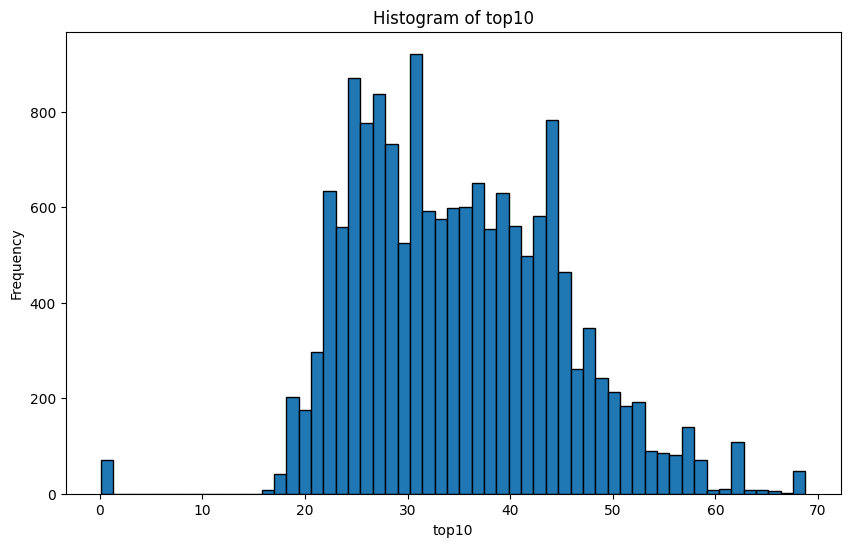

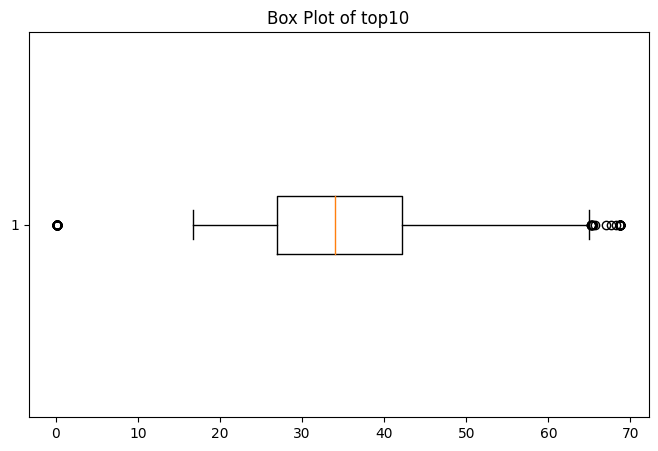

Mean: 34.97958731762774
Median: 34.034
Standard Deviation: 9.969619788011206

Frequency Distribution:
 24.990    99
35.213    94
35.600    73
36.982    72
28.430    72
          ..
43.957     1
41.315     1
38.673     1
39.039     1
21.317     1
Name: top10, Length: 6970, dtype: int64

Skewness: 0.34880958495823083
Kurtosis: 0.24827084763113438


In [ ]:
column_name = 'top10'

# Descriptive Statistics
mean_value = data[column_name].mean()
median_value = data[column_name].median()
std_dev = data[column_name].std()

# Frequency Distribution
frequency_distribution = data[column_name].value_counts()

# Visualization - Histogram
plt.figure(figsize=(10, 6))
plt.hist(data[column_name], bins='auto', edgecolor='black')
plt.title('Histogram of {}'.format(column_name))
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

# Visualization - Box Plot
plt.figure(figsize=(8, 5))
plt.boxplot(data[column_name], vert=False)
plt.title('Box Plot of {}'.format(column_name))
plt.show()

# Measures of Shape
skewness = data[column_name].skew()
kurtosis = data[column_name].kurtosis()

# Display Summary Statistics
print("Mean:", mean_value)
print("Median:", median_value)
print("Standard Deviation:", std_dev)
print("\nFrequency Distribution:\n", frequency_distribution)
print("\nSkewness:", skewness)
print("Kurtosis:", kurtosis)

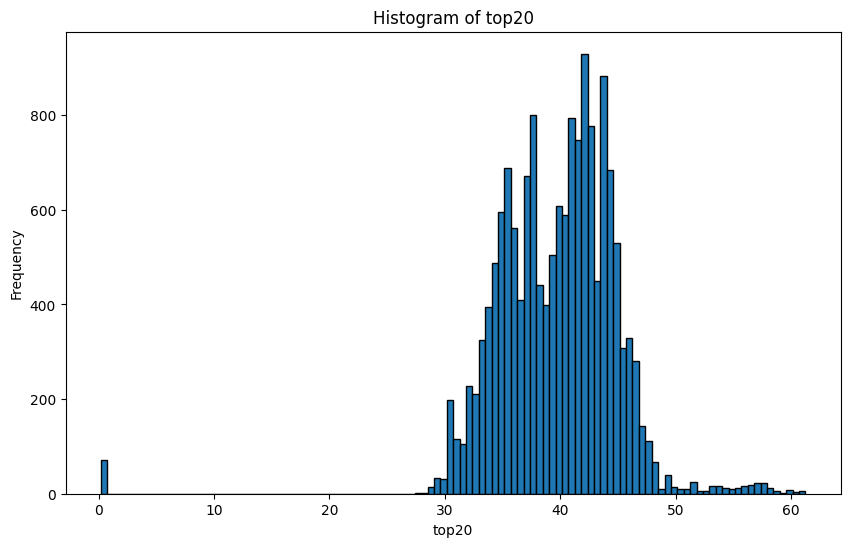

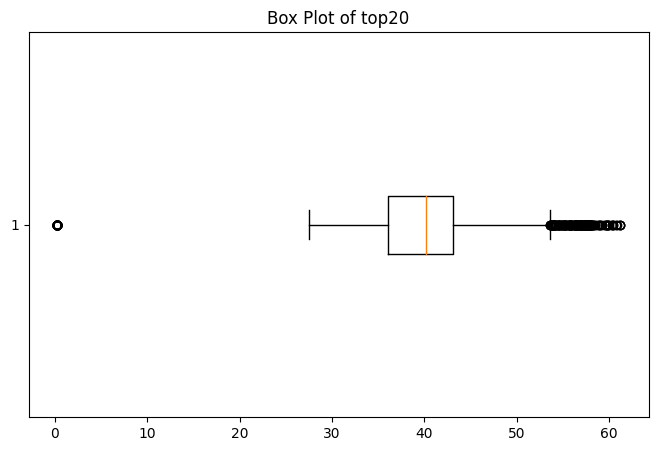

Mean: 39.68280793279859
Median: 40.153
Standard Deviation: 5.336525493015334

Frequency Distribution:
 34.273    98
41.958    82
35.925    72
43.842    72
44.387    71
          ..
37.658     1
38.039     1
38.520     1
39.241     1
35.322     1
Name: top20, Length: 6257, dtype: int64

Skewness: -1.5117734042241715
Kurtosis: 12.635345639781452


In [ ]:
column_name = 'top20'

# Descriptive Statistics
mean_value = data[column_name].mean()
median_value = data[column_name].median()
std_dev = data[column_name].std()

# Frequency Distribution
frequency_distribution = data[column_name].value_counts()

# Visualization - Histogram
plt.figure(figsize=(10, 6))
plt.hist(data[column_name], bins='auto', edgecolor='black')
plt.title('Histogram of {}'.format(column_name))
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

# Visualization - Box Plot
plt.figure(figsize=(8, 5))
plt.boxplot(data[column_name], vert=False)
plt.title('Box Plot of {}'.format(column_name))
plt.show()

# Measures of Shape
skewness = data[column_name].skew()
kurtosis = data[column_name].kurtosis()

# Display Summary Statistics
print("Mean:", mean_value)
print("Median:", median_value)
print("Standard Deviation:", std_dev)
print("\nFrequency Distribution:\n", frequency_distribution)
print("\nSkewness:", skewness)
print("Kurtosis:", kurtosis)

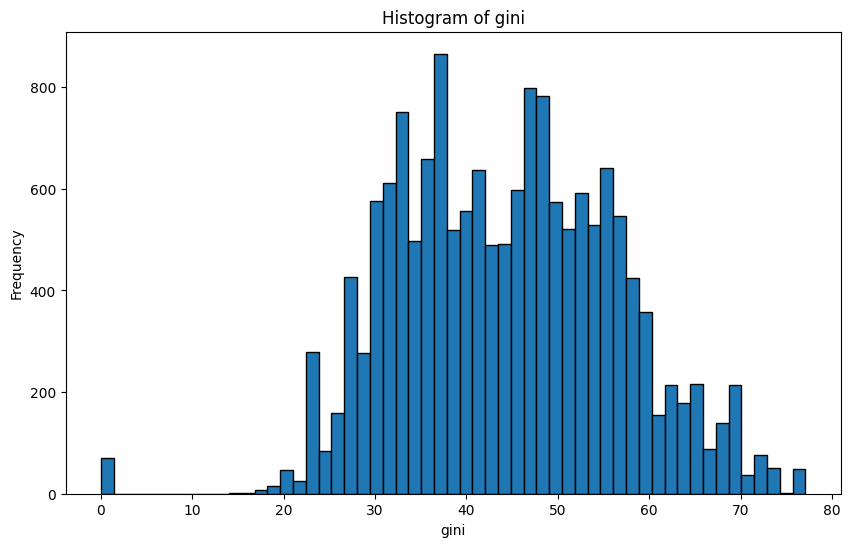

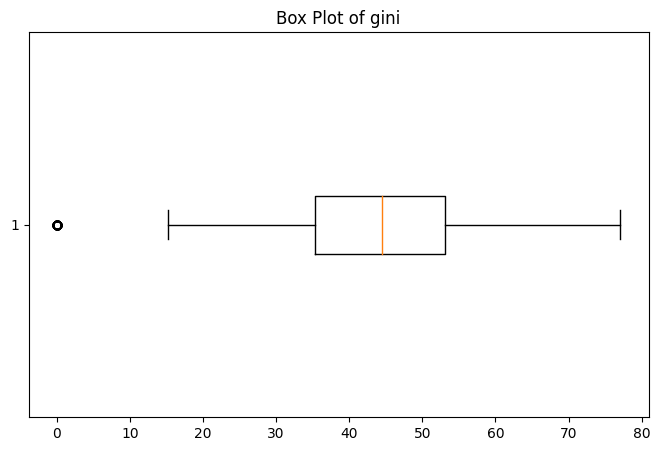

Mean: 44.457831680666956
Median: 44.484
Standard Deviation: 12.012187709457123

Frequency Distribution:
 31.766    98
37.623    72
34.771    72
41.950    72
55.805    72
          ..
48.997     1
48.585     1
48.173     1
47.761     1
28.415     1
Name: gini, Length: 7229, dtype: int64

Skewness: 0.03430225254727381
Kurtosis: 0.0020390195191426486


In [ ]:
column_name = 'gini'

# Descriptive Statistics
mean_value = data[column_name].mean()
median_value = data[column_name].median()
std_dev = data[column_name].std()

# Frequency Distribution
frequency_distribution = data[column_name].value_counts()

# Visualization - Histogram
plt.figure(figsize=(10, 6))
plt.hist(data[column_name], bins='auto', edgecolor='black')
plt.title('Histogram of {}'.format(column_name))
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

# Visualization - Box Plot
plt.figure(figsize=(8, 5))
plt.boxplot(data[column_name], vert=False)
plt.title('Box Plot of {}'.format(column_name))
plt.show()

# Measures of Shape
skewness = data[column_name].skew()
kurtosis = data[column_name].kurtosis()

# Display Summary Statistics
print("Mean:", mean_value)
print("Median:", median_value)
print("Standard Deviation:", std_dev)
print("\nFrequency Distribution:\n", frequency_distribution)
print("\nSkewness:", skewness)
print("Kurtosis:", kurtosis)

Bivariate analysis


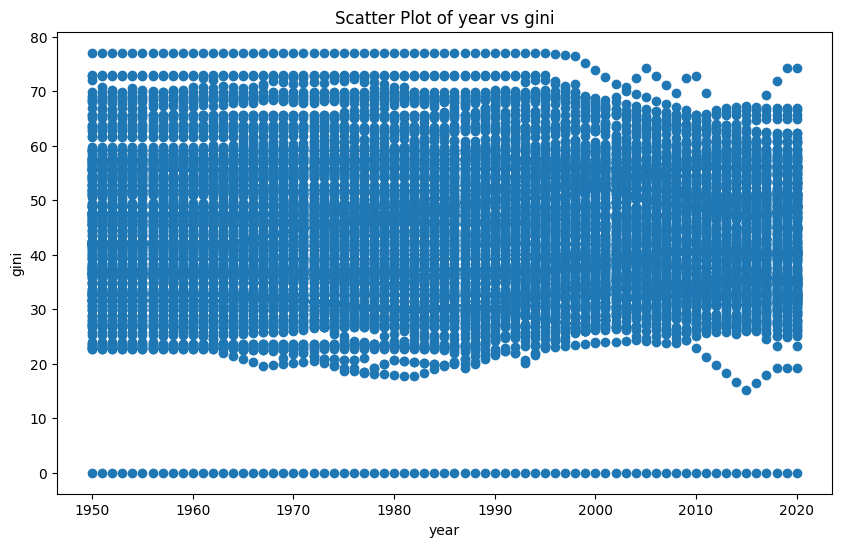

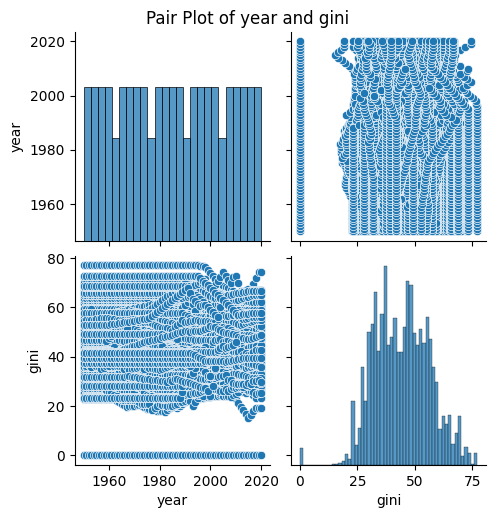

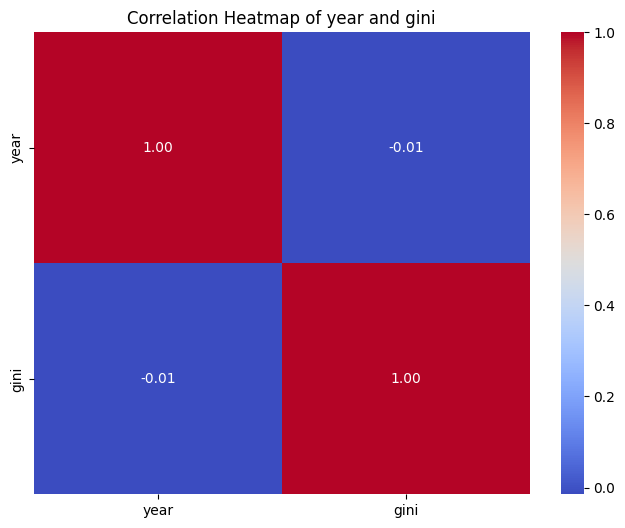

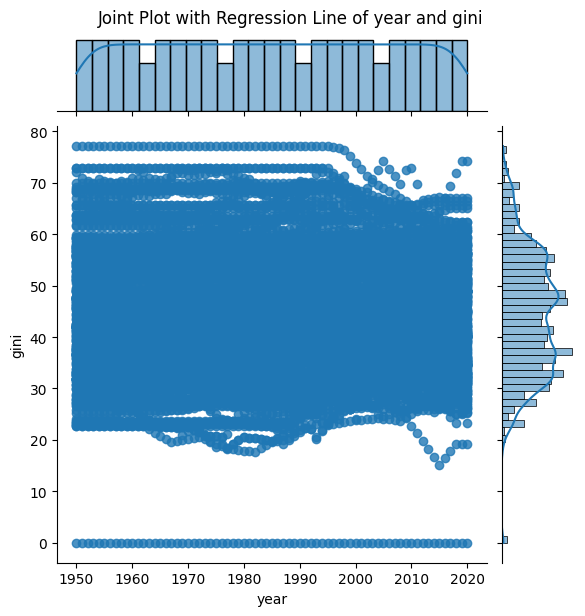

In [ ]:
variable1 = 'year'
variable2 = 'gini'

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(data[variable1], data[variable2])
plt.title('Scatter Plot of {} vs {}'.format(variable1, variable2))
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

# Pair Plot (for multiple variables)
sns.pairplot(data[[variable1, variable2]])  # Add more variables if needed
plt.suptitle('Pair Plot of {} and {}'.format(variable1, variable2), y=1.02)
plt.show()

# Correlation Heatmap
correlation_matrix = data[[variable1, variable2]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of {} and {}'.format(variable1, variable2))
plt.show()

# Joint Plot with Regression Line
sns.jointplot(x=variable1, y=variable2, data=data, kind='reg')
plt.suptitle('Joint Plot with Regression Line of {} and {}'.format(variable1, variable2), y=1.02)
plt.show()


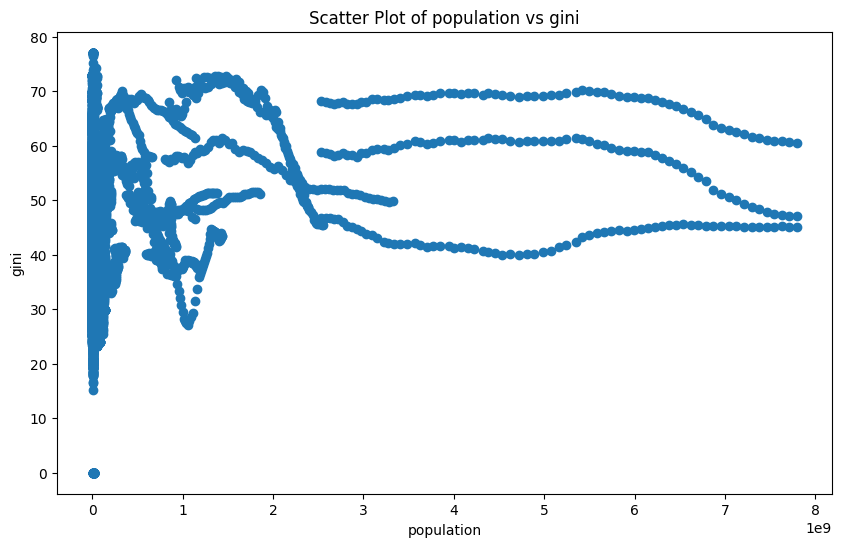

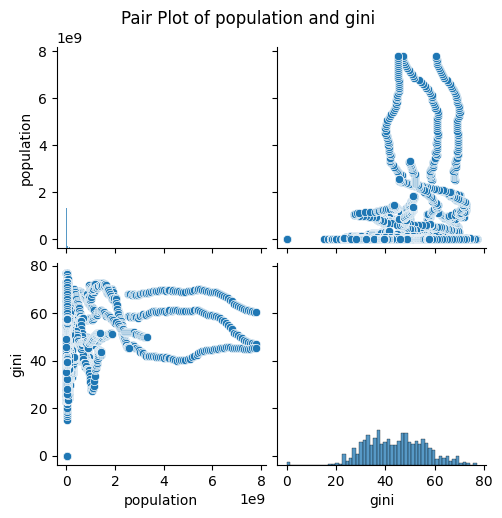

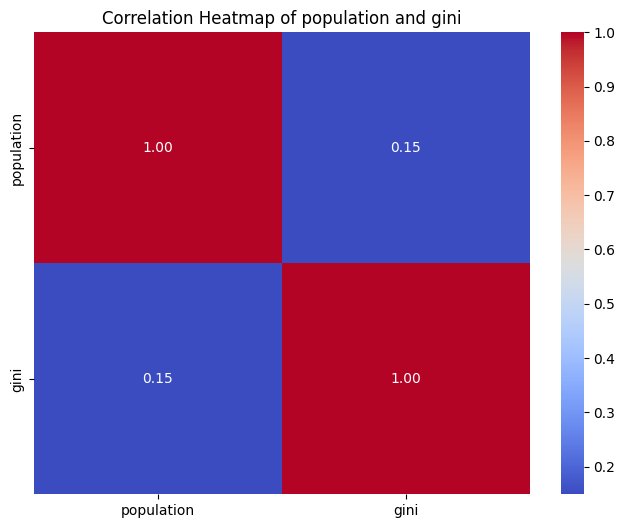

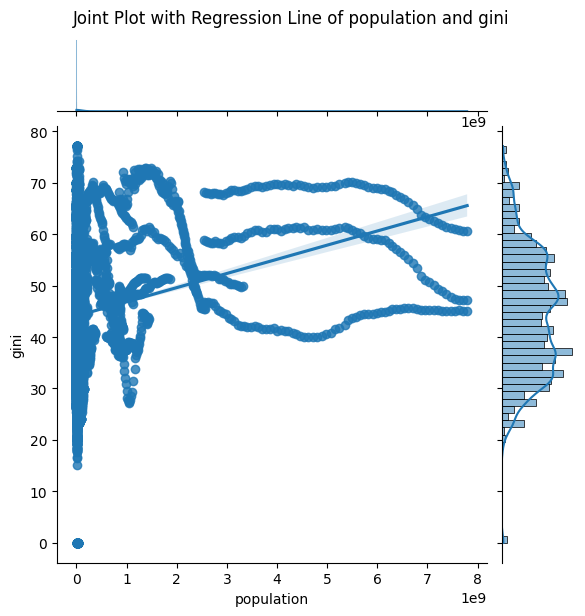

In [ ]:
variable1 = 'population'
variable2 = 'gini'

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(data[variable1], data[variable2])
plt.title('Scatter Plot of {} vs {}'.format(variable1, variable2))
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

# Pair Plot (for multiple variables)
sns.pairplot(data[[variable1, variable2]])  # Add more variables if needed
plt.suptitle('Pair Plot of {} and {}'.format(variable1, variable2), y=1.02)
plt.show()

# Correlation Heatmap
correlation_matrix = data[[variable1, variable2]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of {} and {}'.format(variable1, variable2))
plt.show()

# Joint Plot with Regression Line
sns.jointplot(x=variable1, y=variable2, data=data, kind='reg')
plt.suptitle('Joint Plot with Regression Line of {} and {}'.format(variable1, variable2), y=1.02)
plt.show()


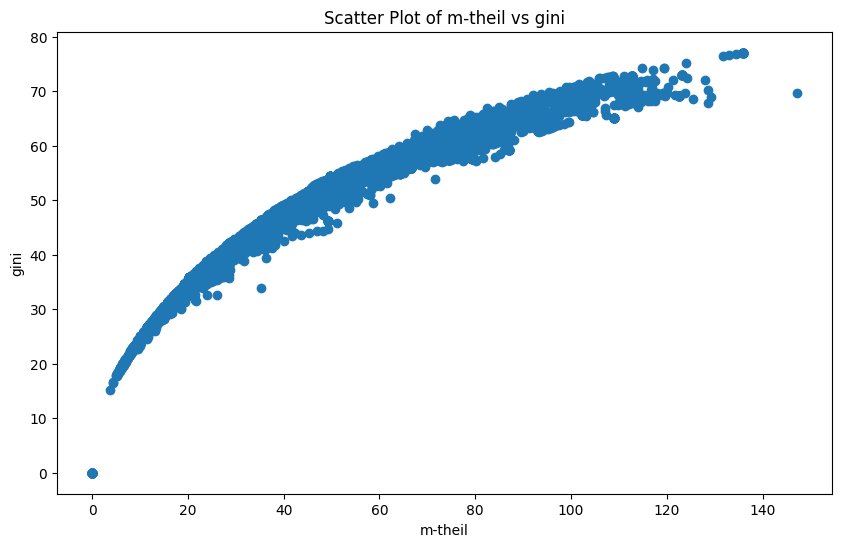

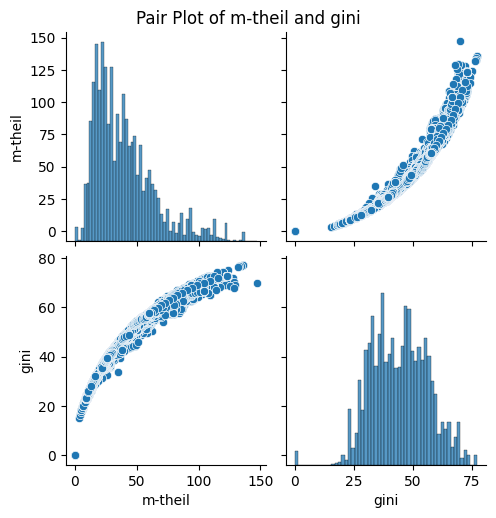

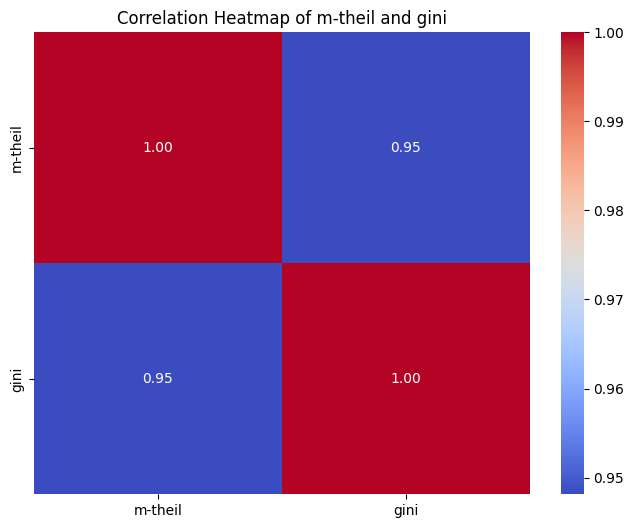

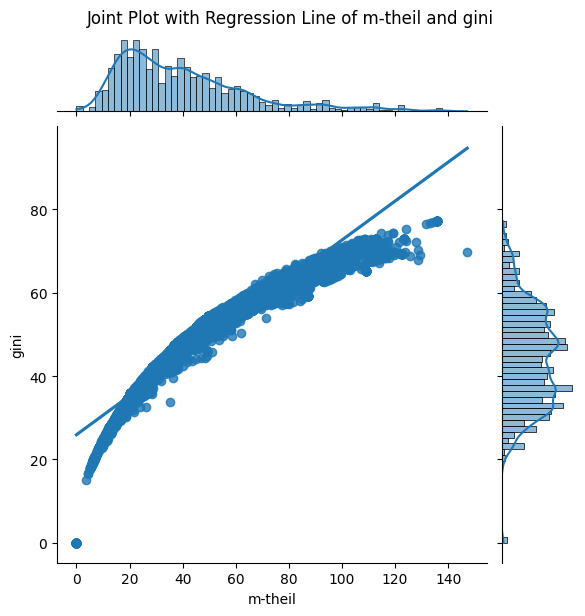

In [ ]:
variable1 = 'm-theil'
variable2 = 'gini'

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(data[variable1], data[variable2])
plt.title('Scatter Plot of {} vs {}'.format(variable1, variable2))
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

# Pair Plot (for multiple variables)
sns.pairplot(data[[variable1, variable2]])  # Add more variables if needed
plt.suptitle('Pair Plot of {} and {}'.format(variable1, variable2), y=1.02)
plt.show()

# Correlation Heatmap
correlation_matrix = data[[variable1, variable2]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of {} and {}'.format(variable1, variable2))
plt.show()

# Joint Plot with Regression Line
sns.jointplot(x=variable1, y=variable2, data=data, kind='reg')
plt.suptitle('Joint Plot with Regression Line of {} and {}'.format(variable1, variable2), y=1.02)
plt.show()


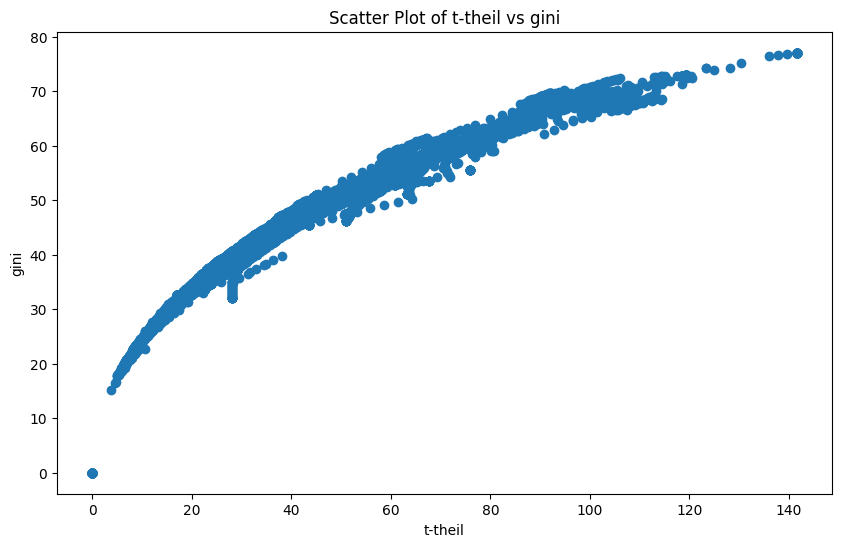

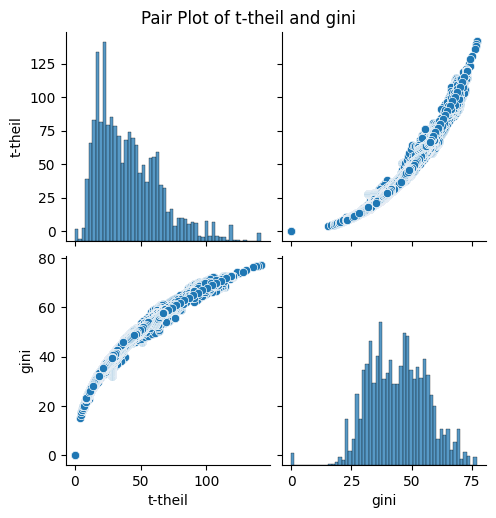

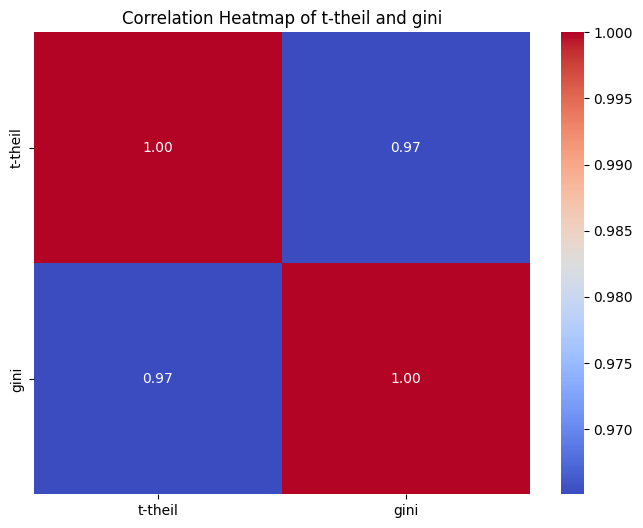

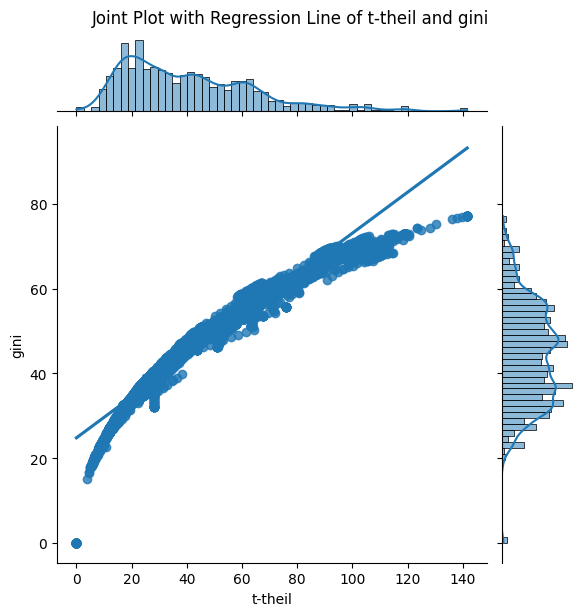

In [ ]:
variable1 = 't-theil'
variable2 = 'gini'

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(data[variable1], data[variable2])
plt.title('Scatter Plot of {} vs {}'.format(variable1, variable2))
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

# Pair Plot (for multiple variables)
sns.pairplot(data[[variable1, variable2]])  # Add more variables if needed
plt.suptitle('Pair Plot of {} and {}'.format(variable1, variable2), y=1.02)
plt.show()

# Correlation Heatmap
correlation_matrix = data[[variable1, variable2]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of {} and {}'.format(variable1, variable2))
plt.show()

# Joint Plot with Regression Line
sns.jointplot(x=variable1, y=variable2, data=data, kind='reg')
plt.suptitle('Joint Plot with Regression Line of {} and {}'.format(variable1, variable2), y=1.02)
plt.show()


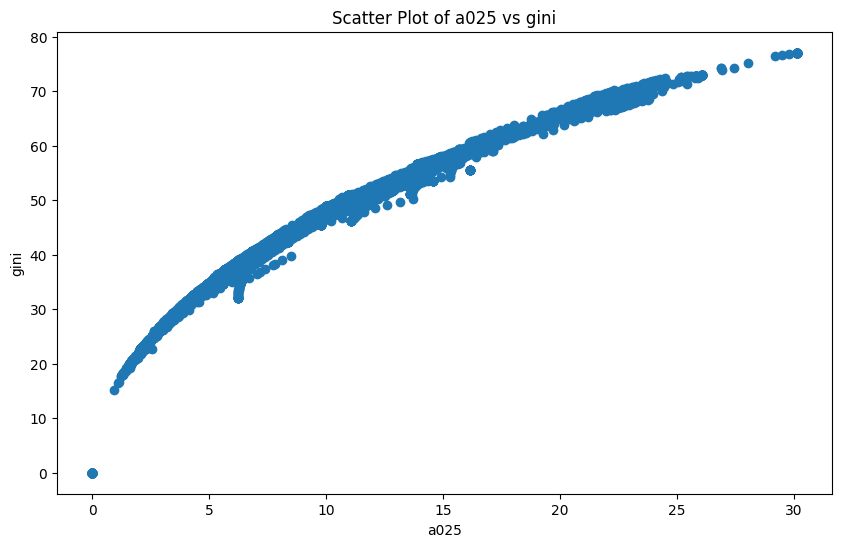

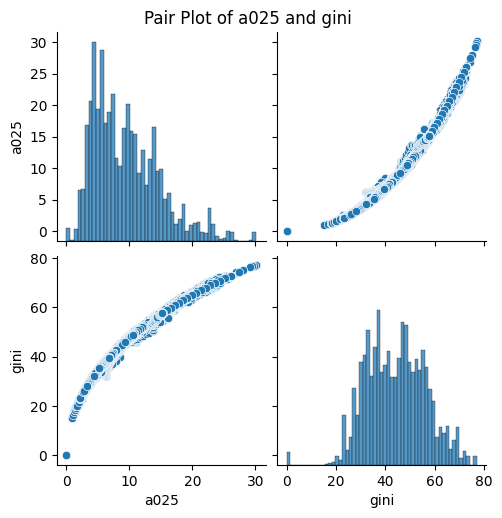

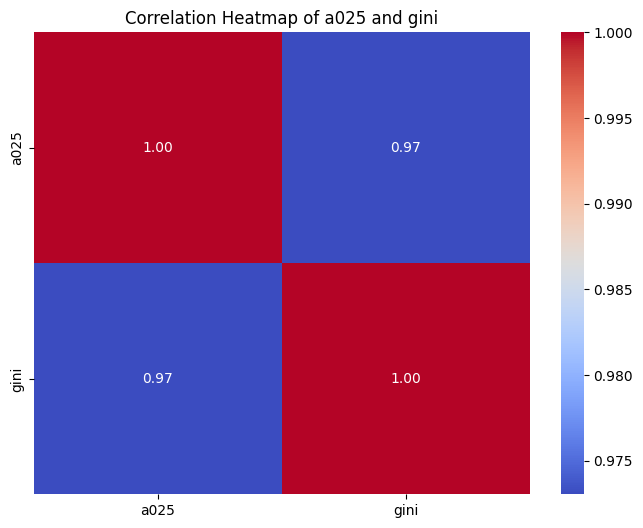

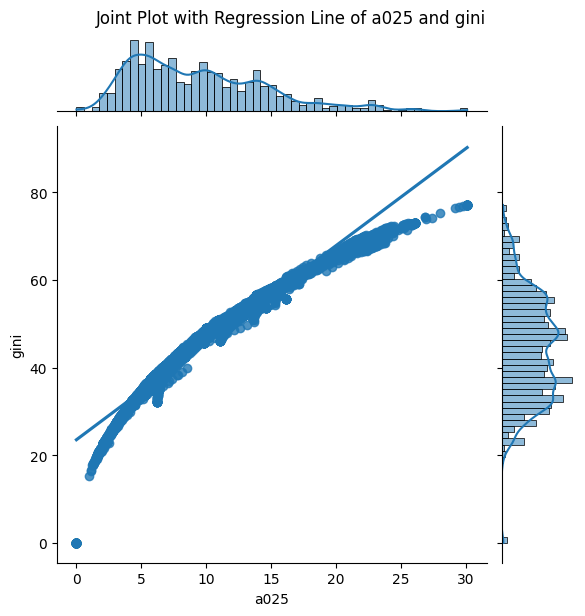

In [ ]:
variable1 = 'a025'
variable2 = 'gini'

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(data[variable1], data[variable2])
plt.title('Scatter Plot of {} vs {}'.format(variable1, variable2))
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

# Pair Plot (for multiple variables)
sns.pairplot(data[[variable1, variable2]])  # Add more variables if needed
plt.suptitle('Pair Plot of {} and {}'.format(variable1, variable2), y=1.02)
plt.show()

# Correlation Heatmap
correlation_matrix = data[[variable1, variable2]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of {} and {}'.format(variable1, variable2))
plt.show()

# Joint Plot with Regression Line
sns.jointplot(x=variable1, y=variable2, data=data, kind='reg')
plt.suptitle('Joint Plot with Regression Line of {} and {}'.format(variable1, variable2), y=1.02)
plt.show()


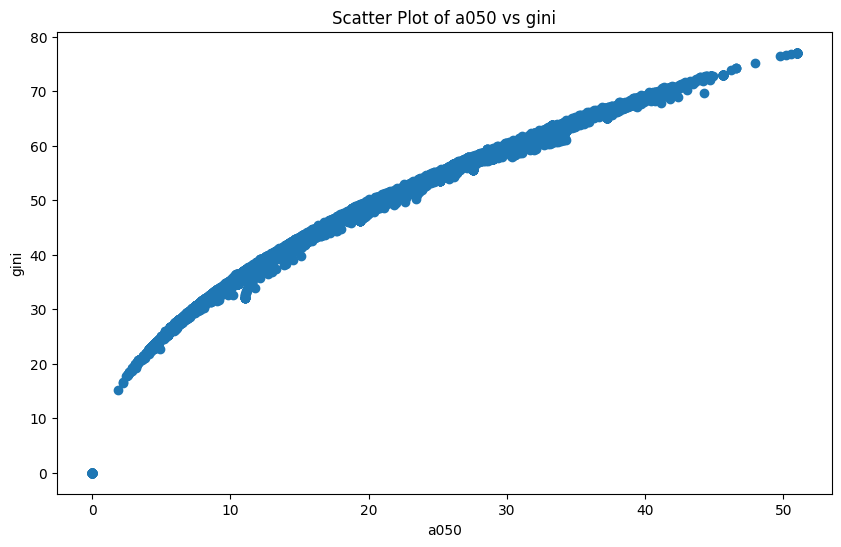

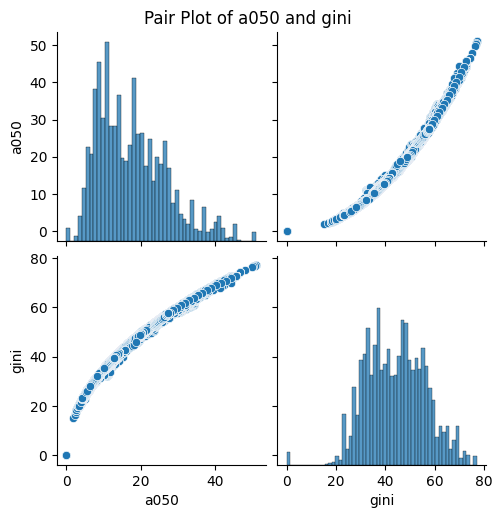

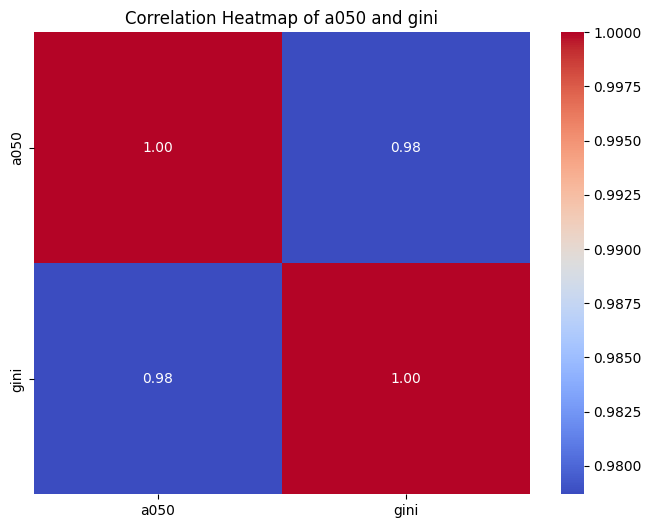

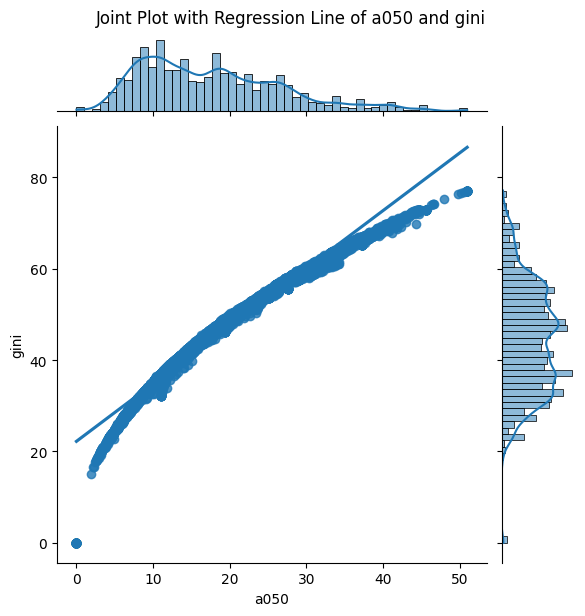

In [ ]:
variable1 = 'a050'
variable2 = 'gini'

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(data[variable1], data[variable2])
plt.title('Scatter Plot of {} vs {}'.format(variable1, variable2))
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

# Pair Plot (for multiple variables)
sns.pairplot(data[[variable1, variable2]])  # Add more variables if needed
plt.suptitle('Pair Plot of {} and {}'.format(variable1, variable2), y=1.02)
plt.show()

# Correlation Heatmap
correlation_matrix = data[[variable1, variable2]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of {} and {}'.format(variable1, variable2))
plt.show()

# Joint Plot with Regression Line
sns.jointplot(x=variable1, y=variable2, data=data, kind='reg')
plt.suptitle('Joint Plot with Regression Line of {} and {}'.format(variable1, variable2), y=1.02)
plt.show()


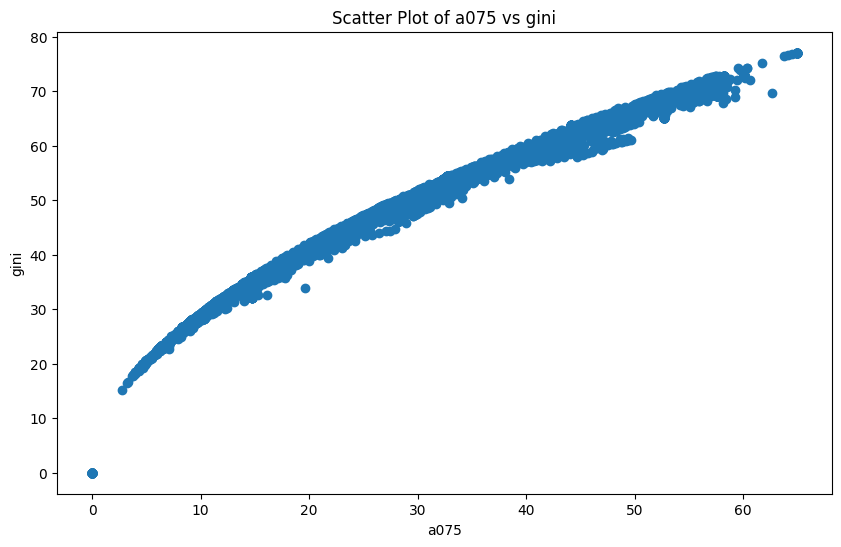

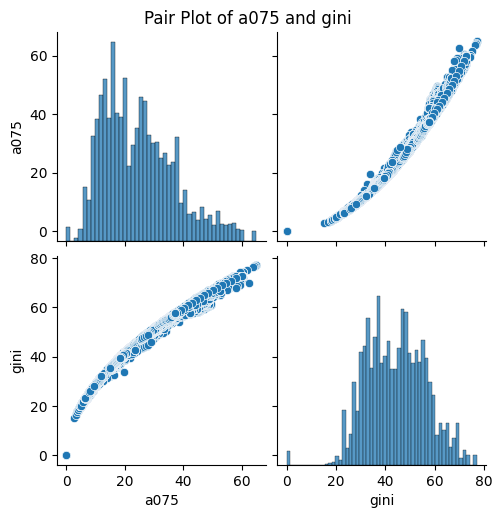

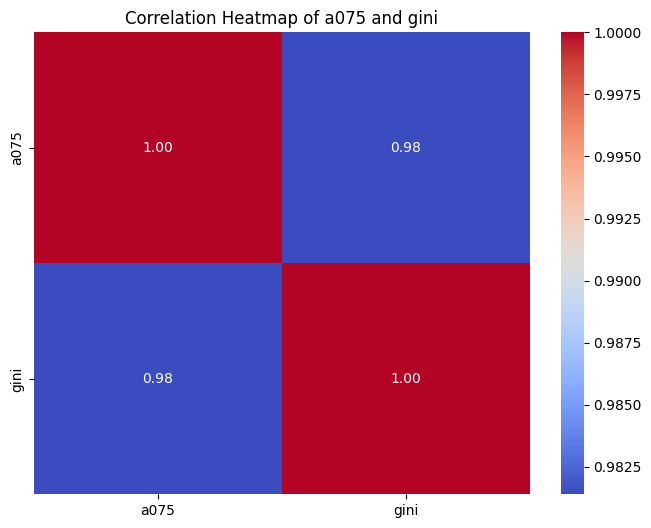

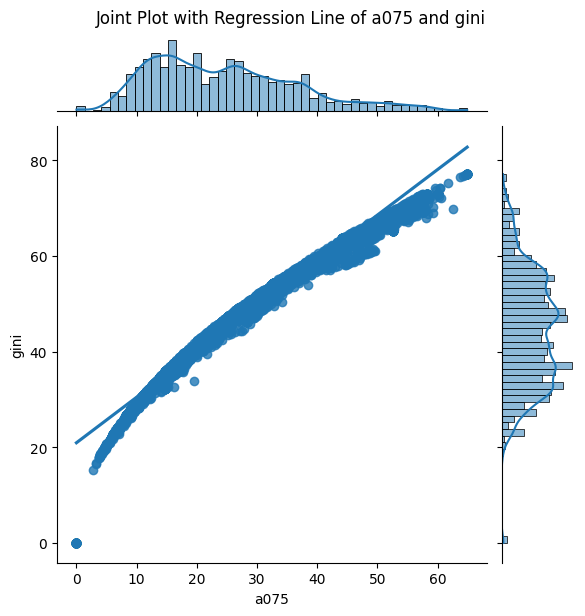

In [ ]:
variable1 = 'a075'
variable2 = 'gini'

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(data[variable1], data[variable2])
plt.title('Scatter Plot of {} vs {}'.format(variable1, variable2))
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

# Pair Plot (for multiple variables)
sns.pairplot(data[[variable1, variable2]])  # Add more variables if needed
plt.suptitle('Pair Plot of {} and {}'.format(variable1, variable2), y=1.02)
plt.show()

# Correlation Heatmap
correlation_matrix = data[[variable1, variable2]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of {} and {}'.format(variable1, variable2))
plt.show()

# Joint Plot with Regression Line
sns.jointplot(x=variable1, y=variable2, data=data, kind='reg')
plt.suptitle('Joint Plot with Regression Line of {} and {}'.format(variable1, variable2), y=1.02)
plt.show()


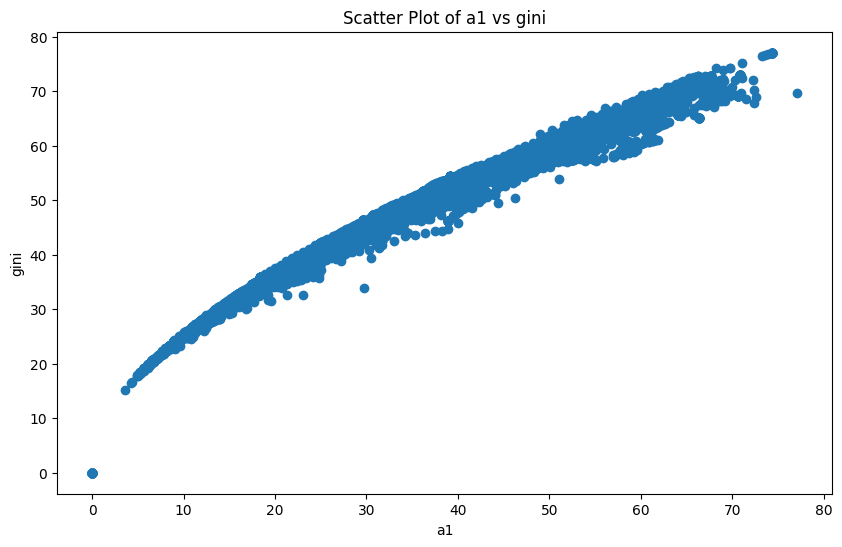

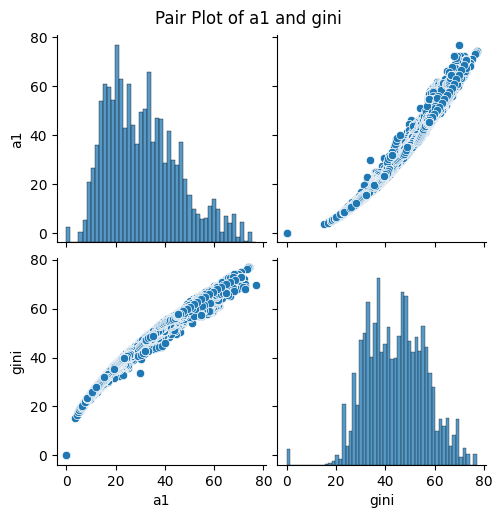

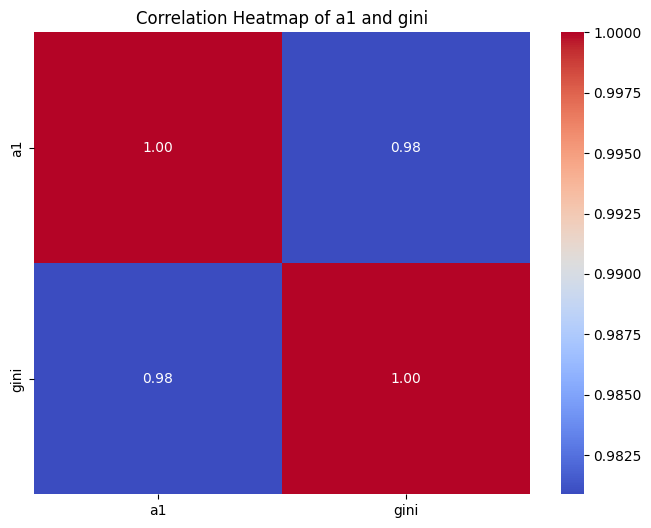

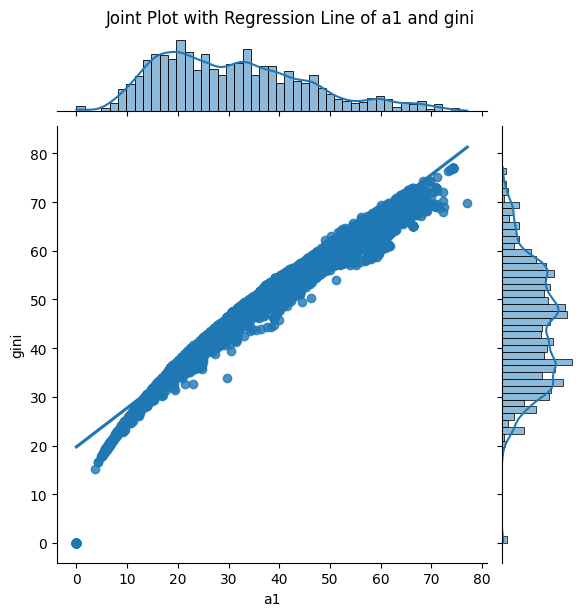

In [ ]:
variable1 = 'a1'
variable2 = 'gini'

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(data[variable1], data[variable2])
plt.title('Scatter Plot of {} vs {}'.format(variable1, variable2))
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

# Pair Plot (for multiple variables)
sns.pairplot(data[[variable1, variable2]])  # Add more variables if needed
plt.suptitle('Pair Plot of {} and {}'.format(variable1, variable2), y=1.02)
plt.show()

# Correlation Heatmap
correlation_matrix = data[[variable1, variable2]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of {} and {}'.format(variable1, variable2))
plt.show()

# Joint Plot with Regression Line
sns.jointplot(x=variable1, y=variable2, data=data, kind='reg')
plt.suptitle('Joint Plot with Regression Line of {} and {}'.format(variable1, variable2), y=1.02)
plt.show()


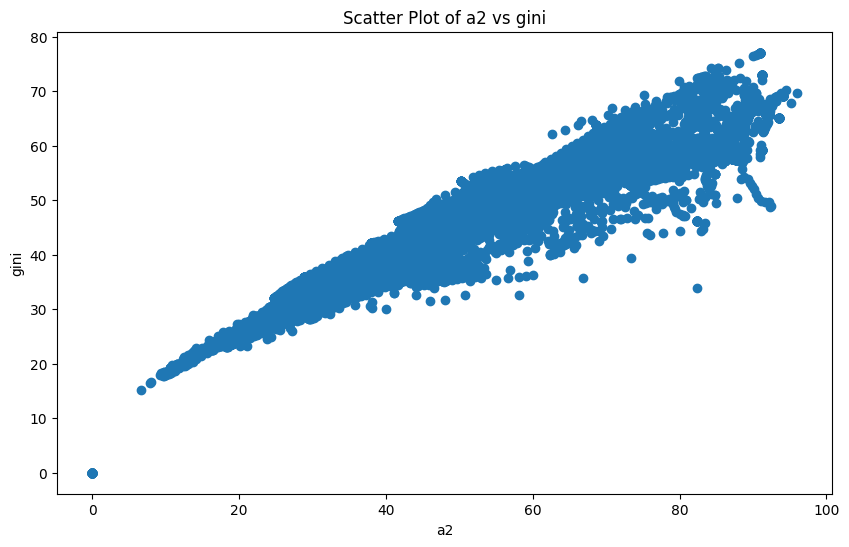

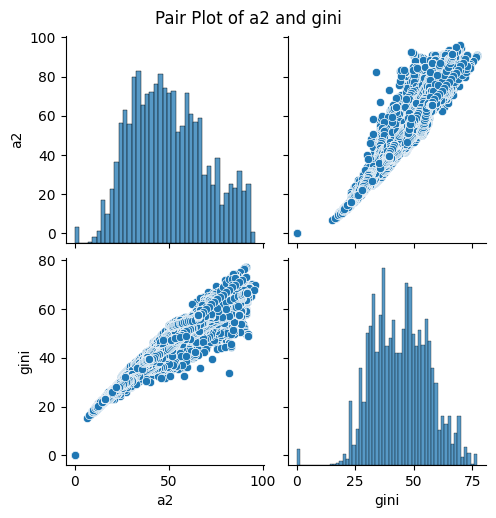

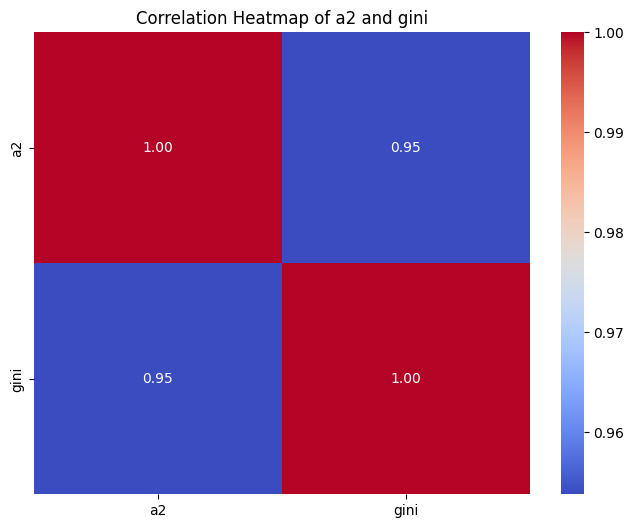

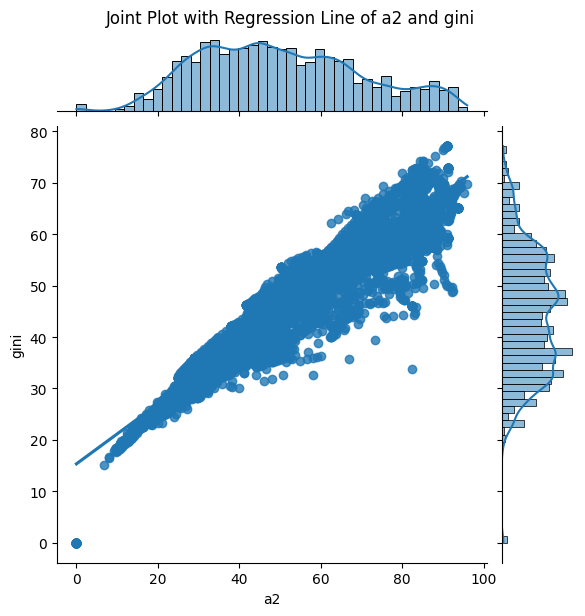

In [ ]:
variable1 = 'a2'
variable2 = 'gini'

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(data[variable1], data[variable2])
plt.title('Scatter Plot of {} vs {}'.format(variable1, variable2))
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

# Pair Plot (for multiple variables)
sns.pairplot(data[[variable1, variable2]])  # Add more variables if needed
plt.suptitle('Pair Plot of {} and {}'.format(variable1, variable2), y=1.02)
plt.show()

# Correlation Heatmap
correlation_matrix = data[[variable1, variable2]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of {} and {}'.format(variable1, variable2))
plt.show()

# Joint Plot with Regression Line
sns.jointplot(x=variable1, y=variable2, data=data, kind='reg')
plt.suptitle('Joint Plot with Regression Line of {} and {}'.format(variable1, variable2), y=1.02)
plt.show()


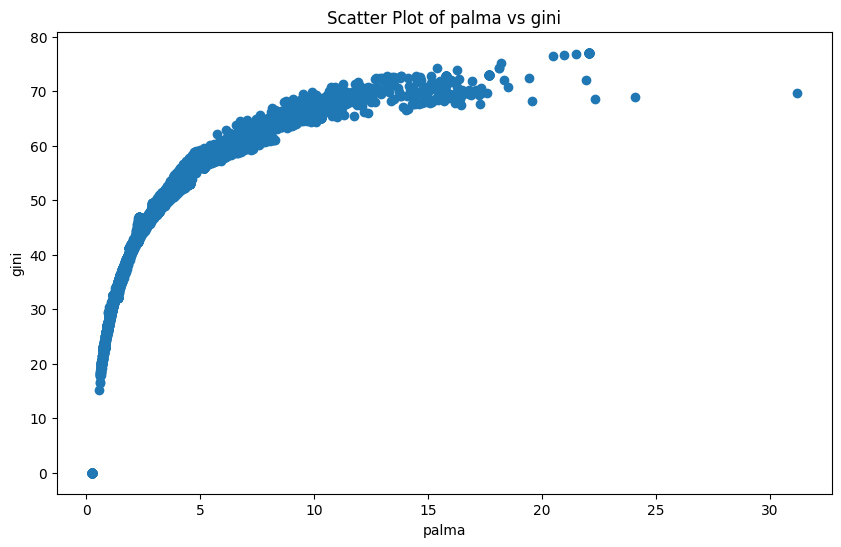

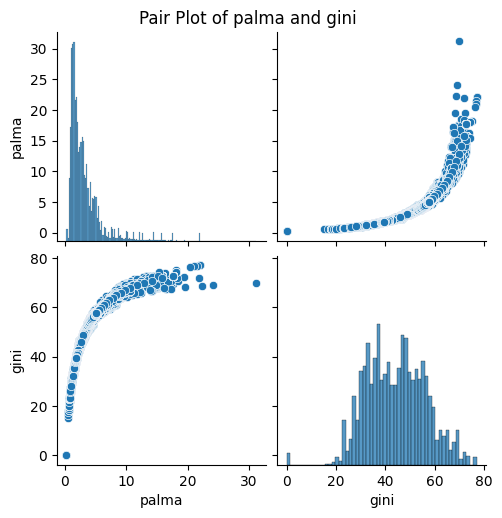

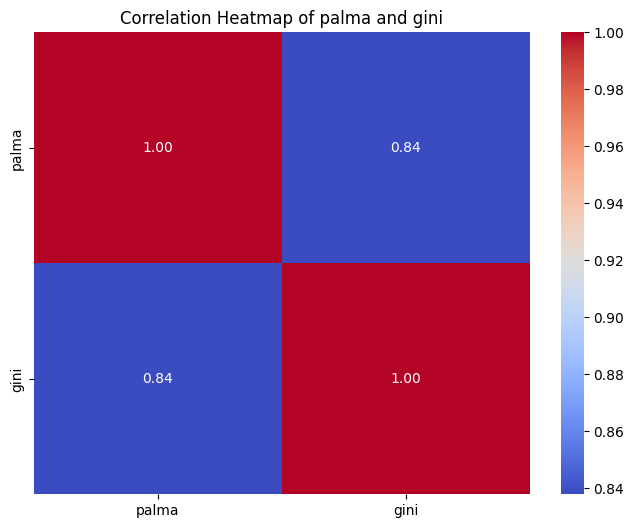

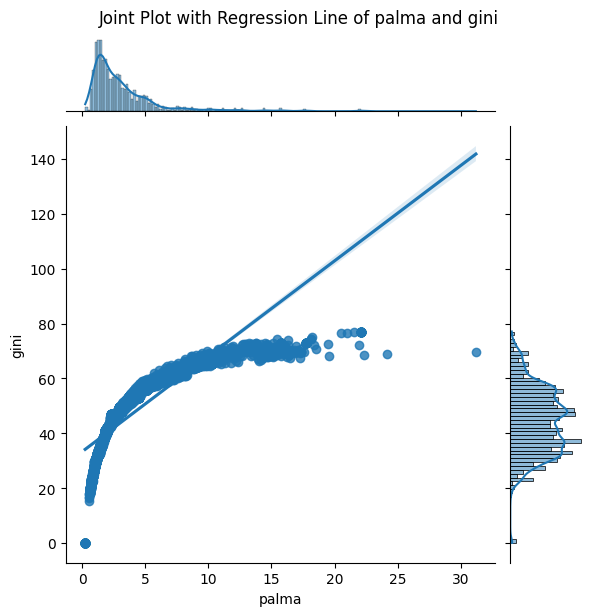

In [ ]:
variable1 = 'palma'
variable2 = 'gini'

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(data[variable1], data[variable2])
plt.title('Scatter Plot of {} vs {}'.format(variable1, variable2))
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

# Pair Plot (for multiple variables)
sns.pairplot(data[[variable1, variable2]])  # Add more variables if needed
plt.suptitle('Pair Plot of {} and {}'.format(variable1, variable2), y=1.02)
plt.show()

# Correlation Heatmap
correlation_matrix = data[[variable1, variable2]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of {} and {}'.format(variable1, variable2))
plt.show()

# Joint Plot with Regression Line
sns.jointplot(x=variable1, y=variable2, data=data, kind='reg')
plt.suptitle('Joint Plot with Regression Line of {} and {}'.format(variable1, variable2), y=1.02)
plt.show()


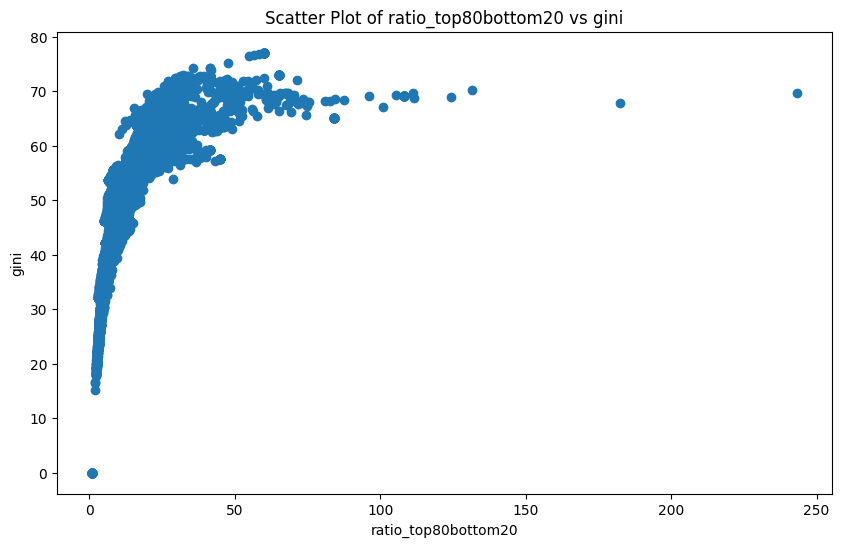

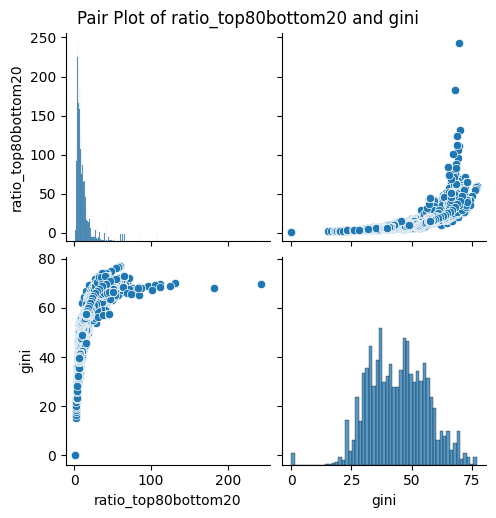

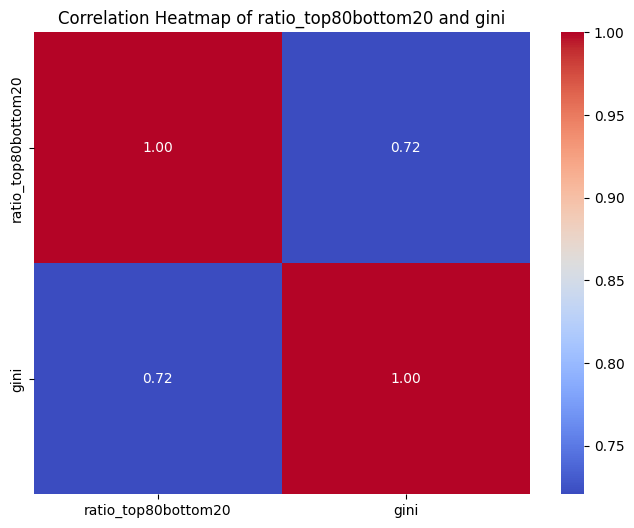

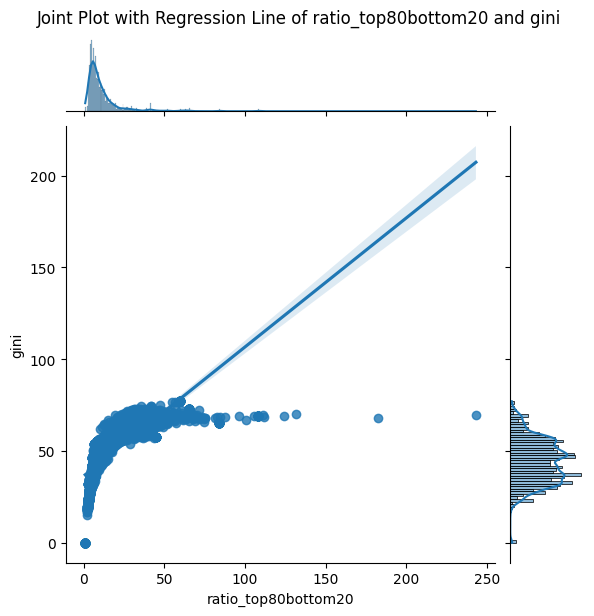

In [ ]:
variable1 = 'ratio_top80bottom20'
variable2 = 'gini'

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(data[variable1], data[variable2])
plt.title('Scatter Plot of {} vs {}'.format(variable1, variable2))
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

# Pair Plot (for multiple variables)
sns.pairplot(data[[variable1, variable2]])  # Add more variables if needed
plt.suptitle('Pair Plot of {} and {}'.format(variable1, variable2), y=1.02)
plt.show()

# Correlation Heatmap
correlation_matrix = data[[variable1, variable2]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of {} and {}'.format(variable1, variable2))
plt.show()

# Joint Plot with Regression Line
sns.jointplot(x=variable1, y=variable2, data=data, kind='reg')
plt.suptitle('Joint Plot with Regression Line of {} and {}'.format(variable1, variable2), y=1.02)
plt.show()


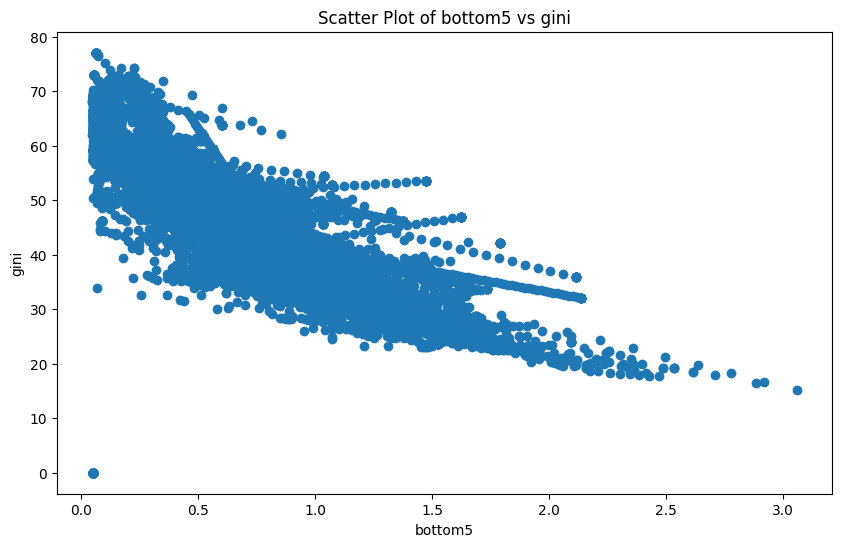

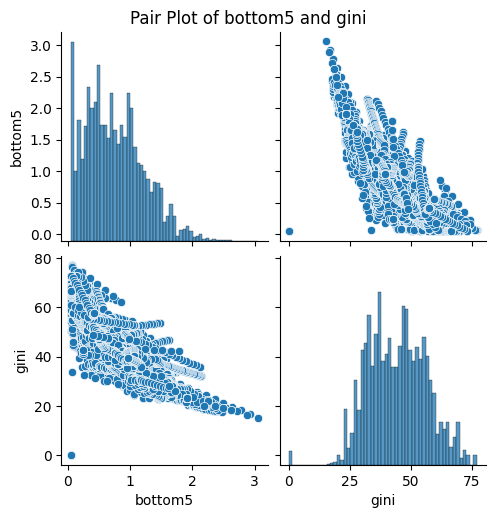

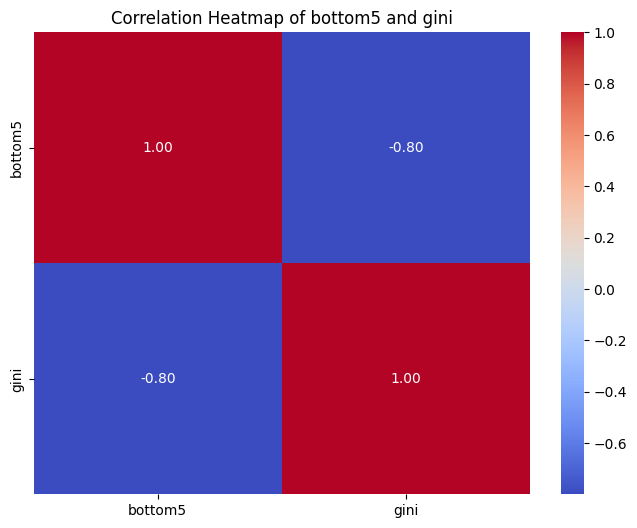

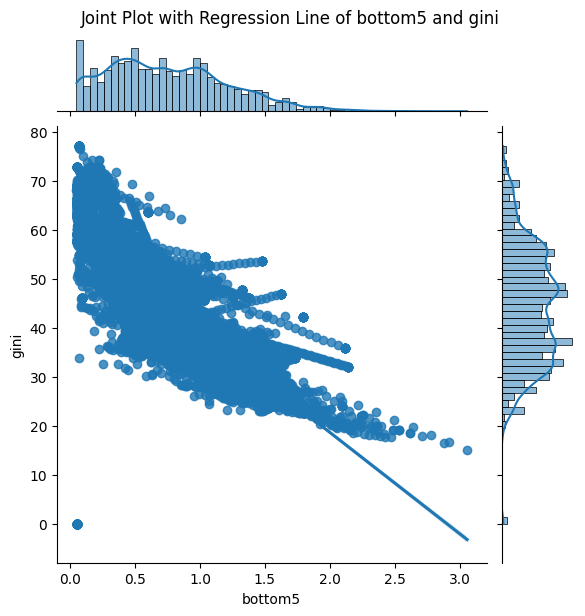

In [ ]:
variable1 = 'bottom5'
variable2 = 'gini'

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(data[variable1], data[variable2])
plt.title('Scatter Plot of {} vs {}'.format(variable1, variable2))
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

# Pair Plot (for multiple variables)
sns.pairplot(data[[variable1, variable2]])  # Add more variables if needed
plt.suptitle('Pair Plot of {} and {}'.format(variable1, variable2), y=1.02)
plt.show()

# Correlation Heatmap
correlation_matrix = data[[variable1, variable2]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of {} and {}'.format(variable1, variable2))
plt.show()

# Joint Plot with Regression Line
sns.jointplot(x=variable1, y=variable2, data=data, kind='reg')
plt.suptitle('Joint Plot with Regression Line of {} and {}'.format(variable1, variable2), y=1.02)
plt.show()


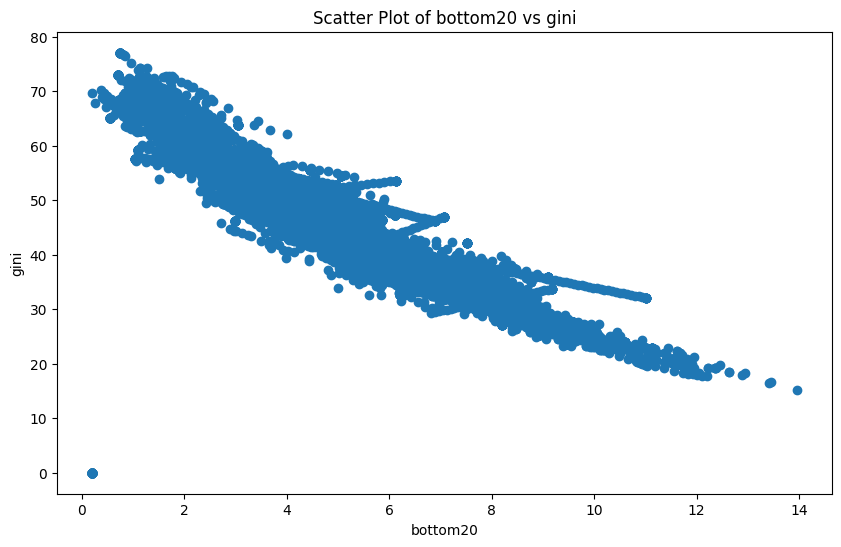

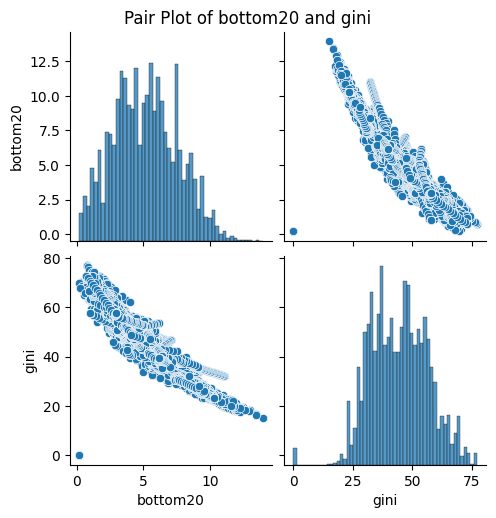

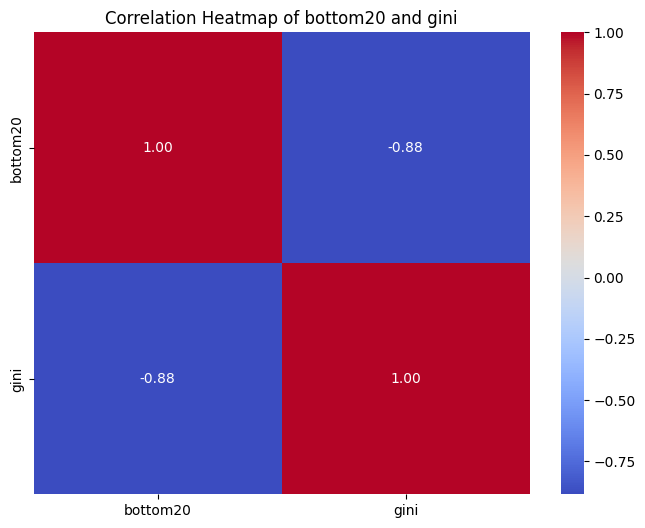

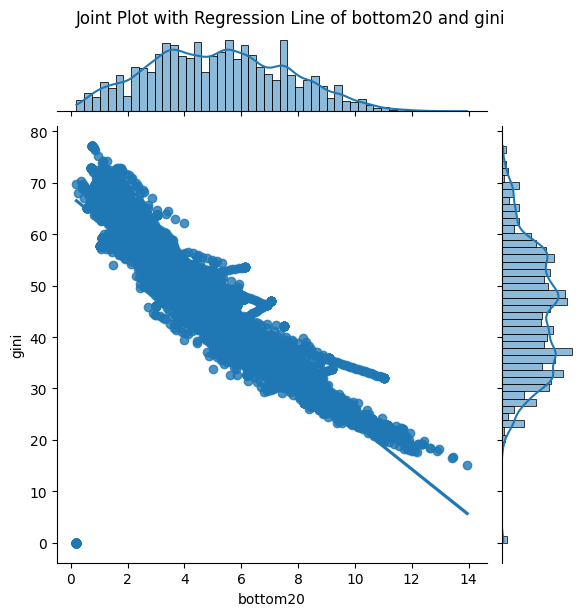

In [ ]:
variable1 = 'bottom20'
variable2 = 'gini'

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(data[variable1], data[variable2])
plt.title('Scatter Plot of {} vs {}'.format(variable1, variable2))
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

# Pair Plot (for multiple variables)
sns.pairplot(data[[variable1, variable2]])  # Add more variables if needed
plt.suptitle('Pair Plot of {} and {}'.format(variable1, variable2), y=1.02)
plt.show()

# Correlation Heatmap
correlation_matrix = data[[variable1, variable2]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of {} and {}'.format(variable1, variable2))
plt.show()

# Joint Plot with Regression Line
sns.jointplot(x=variable1, y=variable2, data=data, kind='reg')
plt.suptitle('Joint Plot with Regression Line of {} and {}'.format(variable1, variable2), y=1.02)
plt.show()


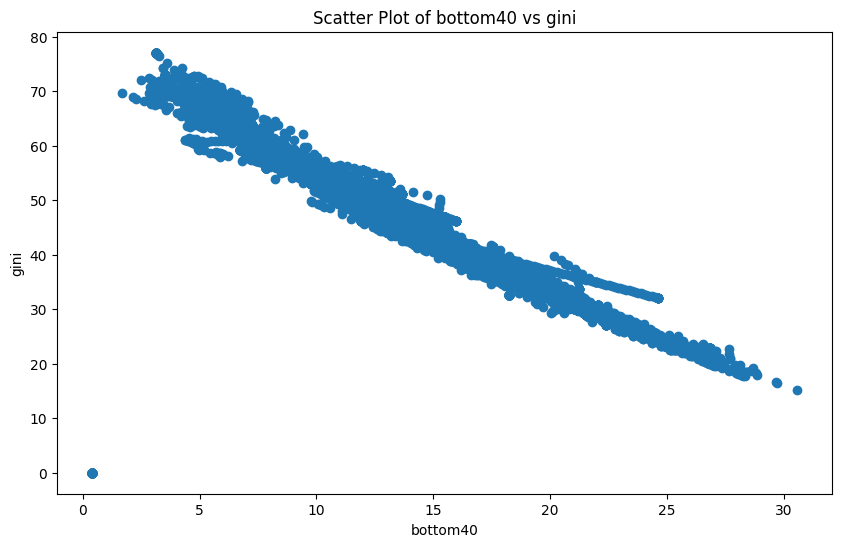

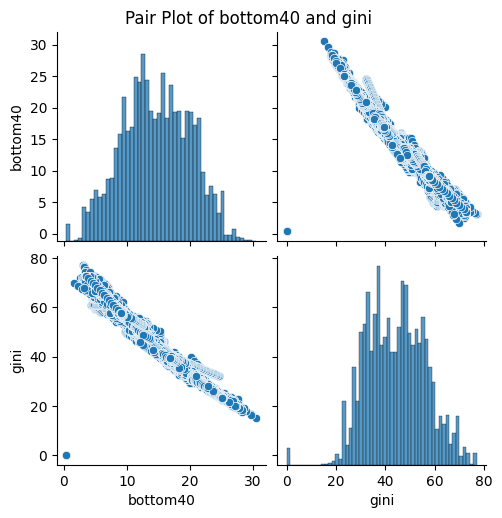

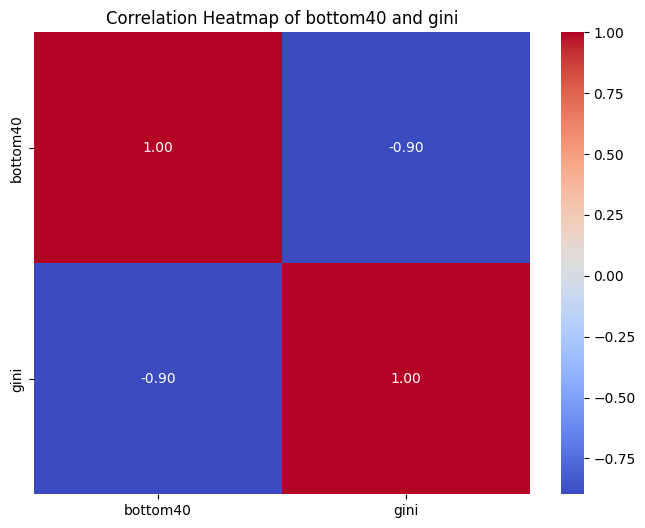

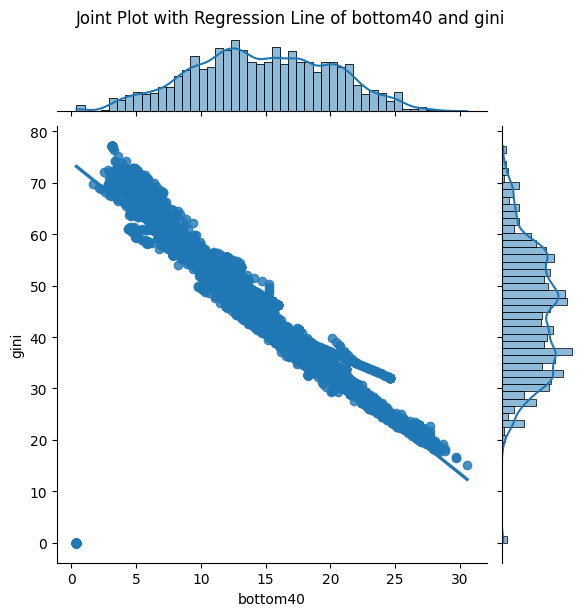

In [ ]:
variable1 = 'bottom40'
variable2 = 'gini'

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(data[variable1], data[variable2])
plt.title('Scatter Plot of {} vs {}'.format(variable1, variable2))
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

# Pair Plot (for multiple variables)
sns.pairplot(data[[variable1, variable2]])  # Add more variables if needed
plt.suptitle('Pair Plot of {} and {}'.format(variable1, variable2), y=1.02)
plt.show()

# Correlation Heatmap
correlation_matrix = data[[variable1, variable2]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of {} and {}'.format(variable1, variable2))
plt.show()

# Joint Plot with Regression Line
sns.jointplot(x=variable1, y=variable2, data=data, kind='reg')
plt.suptitle('Joint Plot with Regression Line of {} and {}'.format(variable1, variable2), y=1.02)
plt.show()


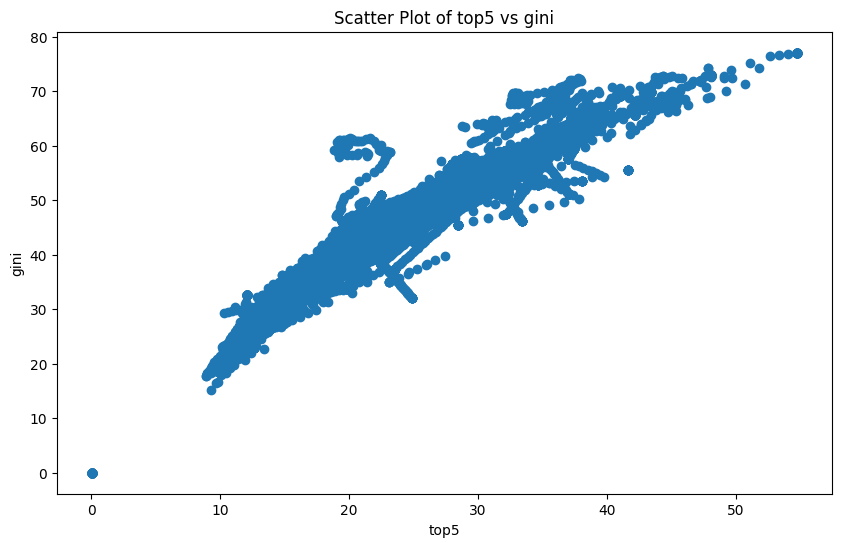

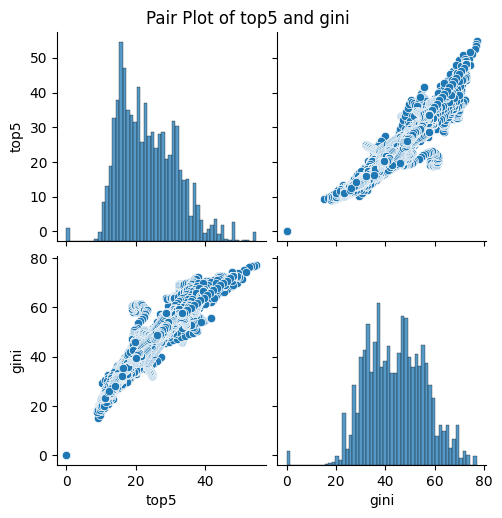

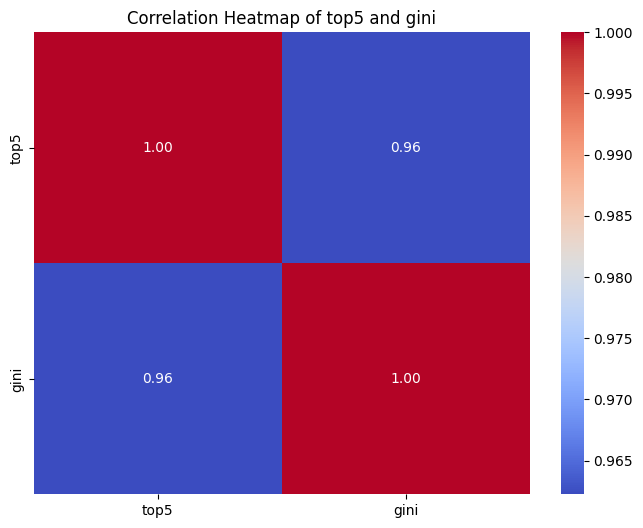

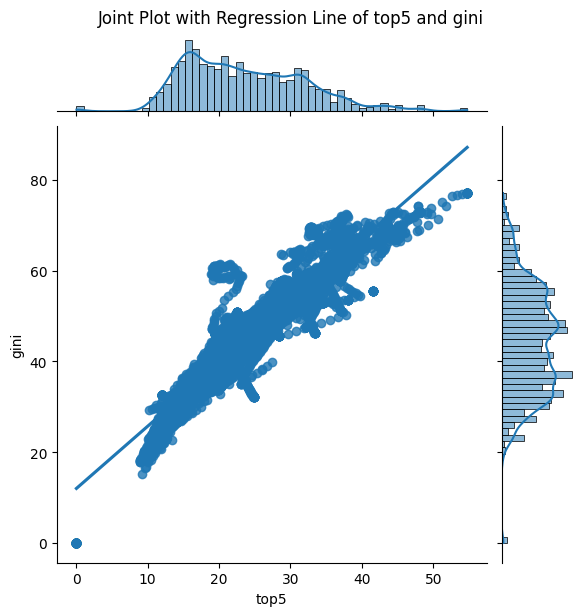

In [ ]:
variable1 = 'top5'
variable2 = 'gini'

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(data[variable1], data[variable2])
plt.title('Scatter Plot of {} vs {}'.format(variable1, variable2))
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

# Pair Plot (for multiple variables)
sns.pairplot(data[[variable1, variable2]])  # Add more variables if needed
plt.suptitle('Pair Plot of {} and {}'.format(variable1, variable2), y=1.02)
plt.show()

# Correlation Heatmap
correlation_matrix = data[[variable1, variable2]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of {} and {}'.format(variable1, variable2))
plt.show()

# Joint Plot with Regression Line
sns.jointplot(x=variable1, y=variable2, data=data, kind='reg')
plt.suptitle('Joint Plot with Regression Line of {} and {}'.format(variable1, variable2), y=1.02)
plt.show()


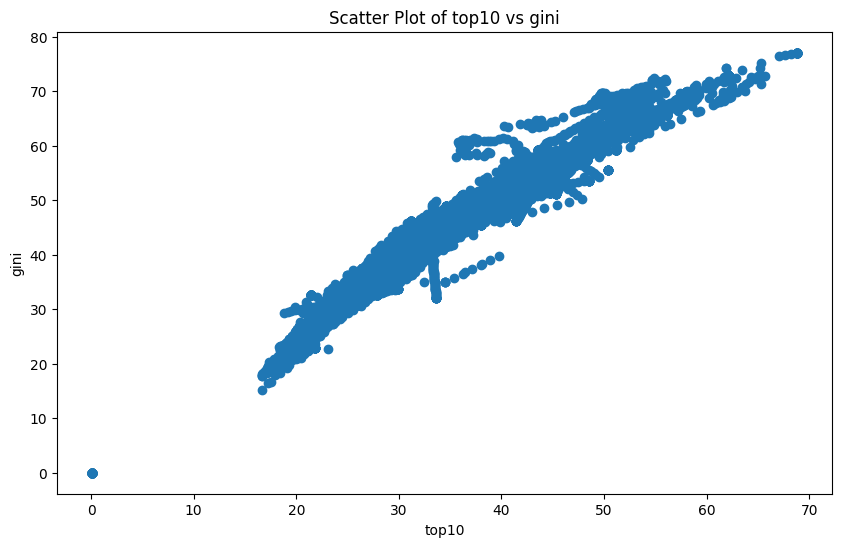

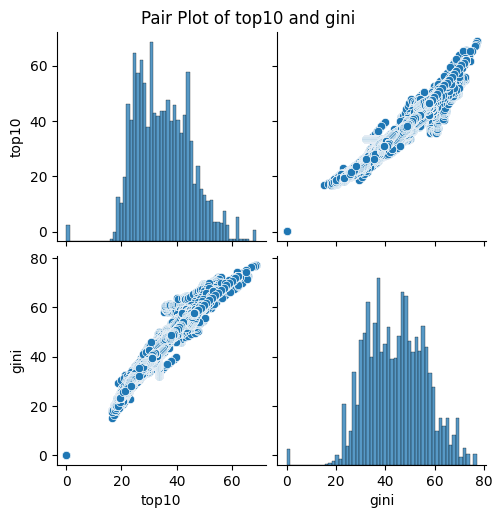

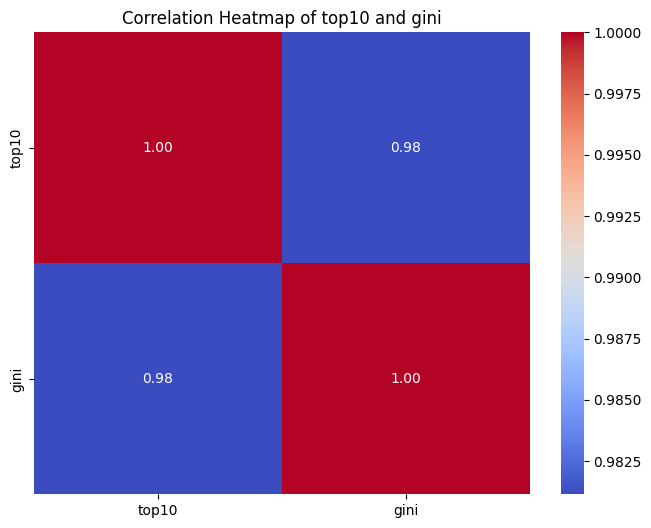

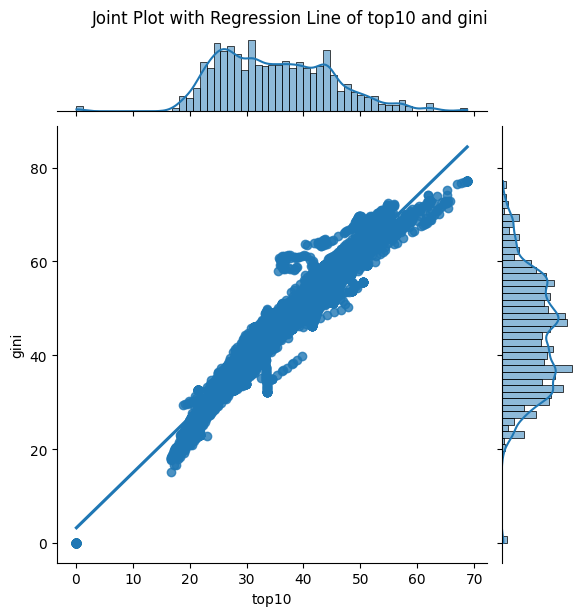

In [ ]:
variable1 = 'top10'
variable2 = 'gini'

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(data[variable1], data[variable2])
plt.title('Scatter Plot of {} vs {}'.format(variable1, variable2))
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

# Pair Plot (for multiple variables)
sns.pairplot(data[[variable1, variable2]])  # Add more variables if needed
plt.suptitle('Pair Plot of {} and {}'.format(variable1, variable2), y=1.02)
plt.show()

# Correlation Heatmap
correlation_matrix = data[[variable1, variable2]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of {} and {}'.format(variable1, variable2))
plt.show()

# Joint Plot with Regression Line
sns.jointplot(x=variable1, y=variable2, data=data, kind='reg')
plt.suptitle('Joint Plot with Regression Line of {} and {}'.format(variable1, variable2), y=1.02)
plt.show()


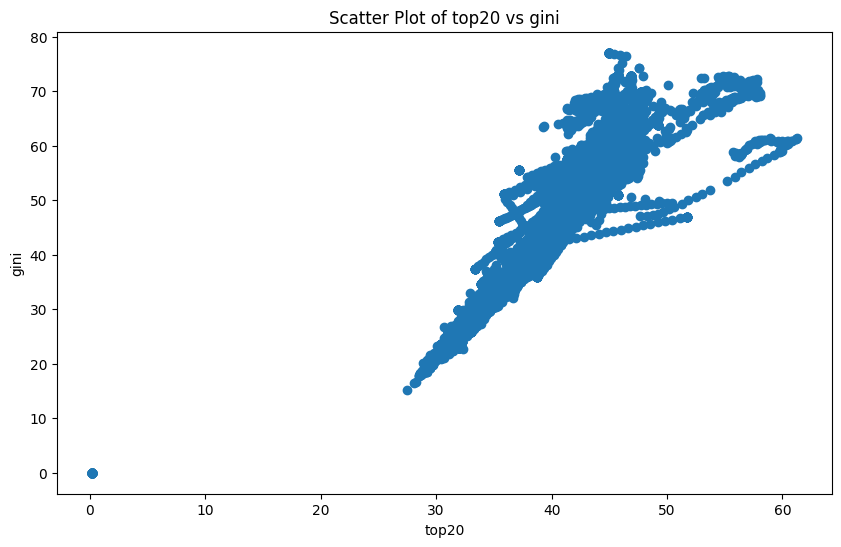

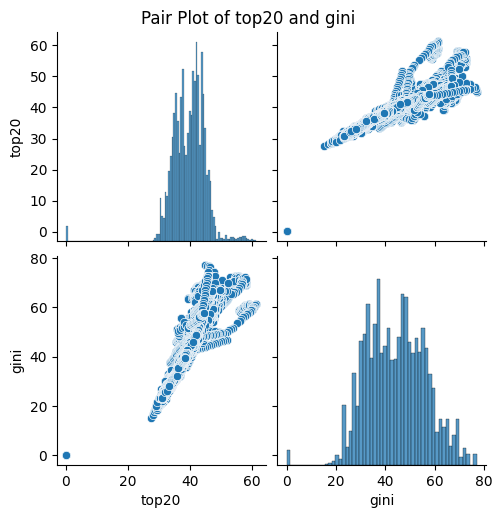

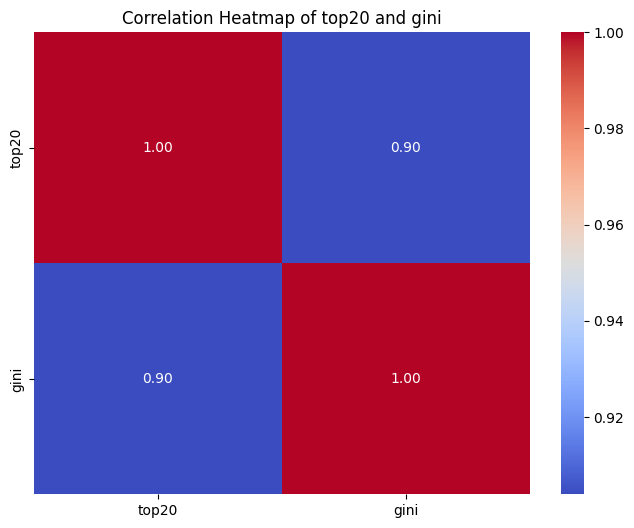

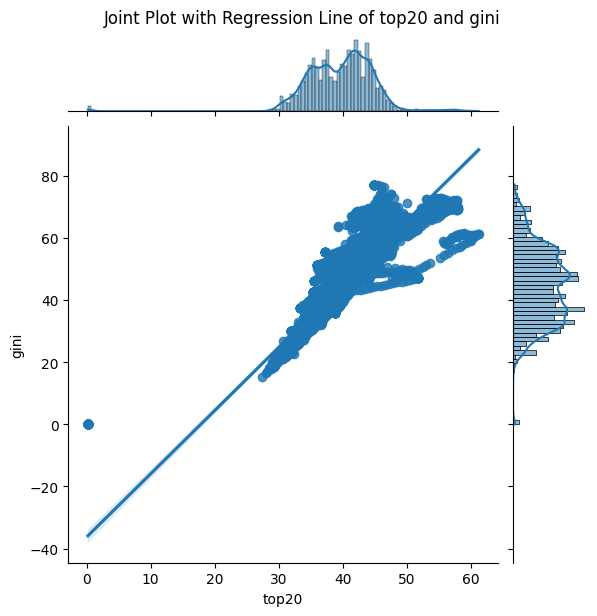

In [ ]:
variable1 = 'top20'
variable2 = 'gini'

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(data[variable1], data[variable2])
plt.title('Scatter Plot of {} vs {}'.format(variable1, variable2))
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

# Pair Plot (for multiple variables)
sns.pairplot(data[[variable1, variable2]])  # Add more variables if needed
plt.suptitle('Pair Plot of {} and {}'.format(variable1, variable2), y=1.02)
plt.show()

# Correlation Heatmap
correlation_matrix = data[[variable1, variable2]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of {} and {}'.format(variable1, variable2))
plt.show()

# Joint Plot with Regression Line
sns.jointplot(x=variable1, y=variable2, data=data, kind='reg')
plt.suptitle('Joint Plot with Regression Line of {} and {}'.format(variable1, variable2), y=1.02)
plt.show()


Multivariate analysis using Correlation matrix

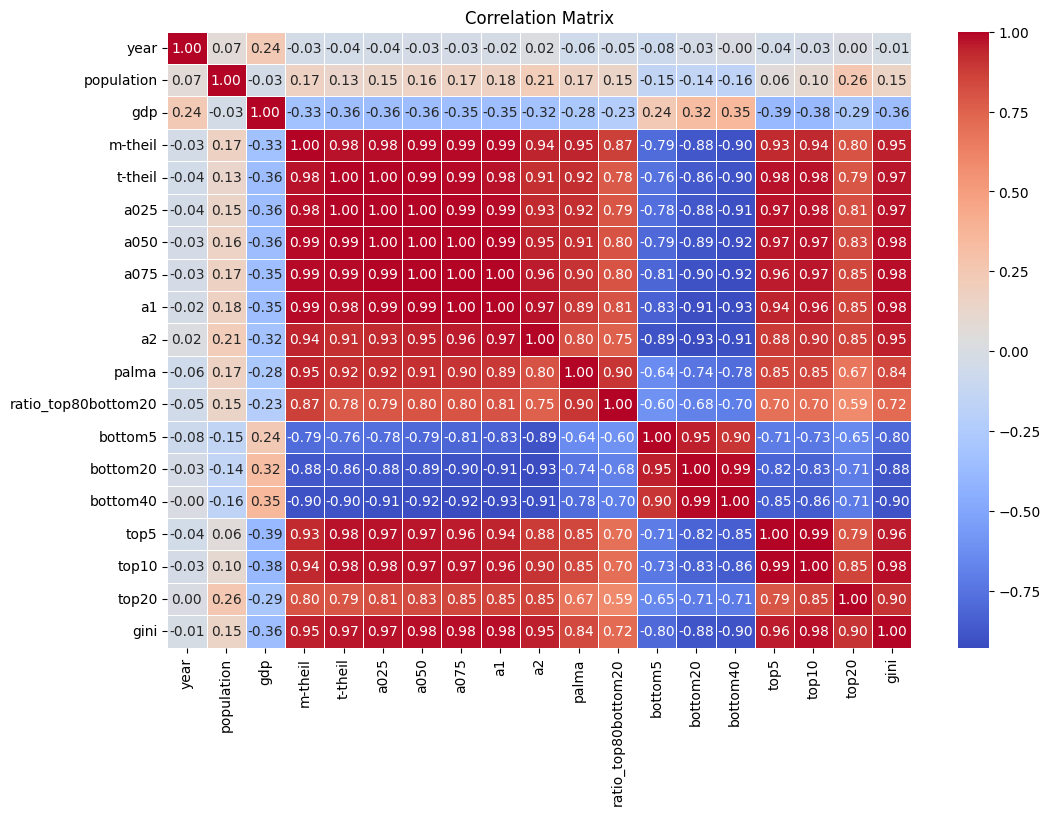

In [ ]:
correlation_matrix = data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Handling Outliers



<Axes: >

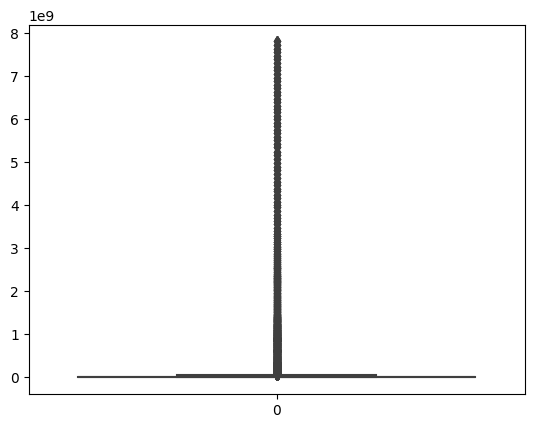

In [ ]:
sns.boxplot(data['population'])

In [ ]:
quart=data['population'].quantile(q=[0.75,0.25]).tolist()
q1=quart[1]
q3=quart[0]
Iqr=q3-q1
min=q1-1.5*Iqr
#print(min)
max=q3+1.5*Iqr
#print(max)
data['population']=np.where(data['population']>max,max,data['population'])

<Axes: >

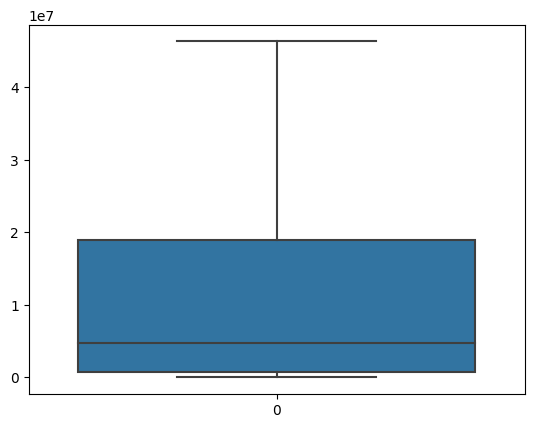

In [ ]:
sns.boxplot(data['population'])

<Axes: >

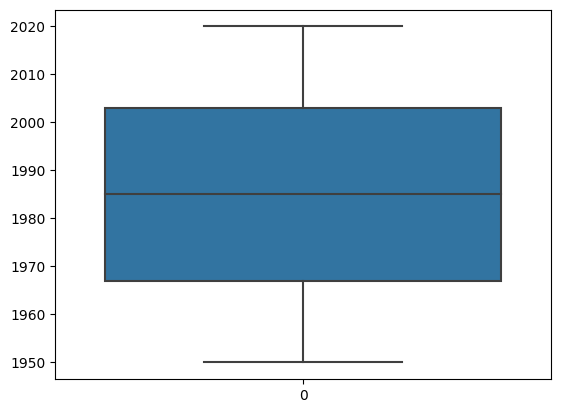

In [ ]:
sns.boxplot(data['year'])

In [ ]:
quart=data['year'].quantile(q=[0.75,0.25]).tolist()
q1=quart[1]
q3=quart[0]
Iqr=q3-q1
min=q1-1.5*Iqr
print(min)
max=q3+1.5*Iqr
print(max)
data['year']=np.where(data['year']>max,max,data['year'])

1913.0
2057.0


<Axes: >

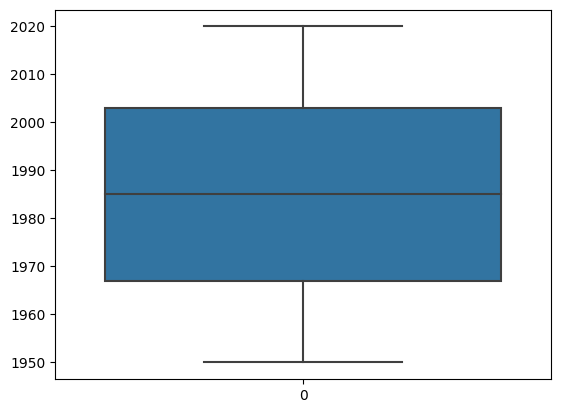

In [ ]:
sns.boxplot(data['year'])

<Axes: >

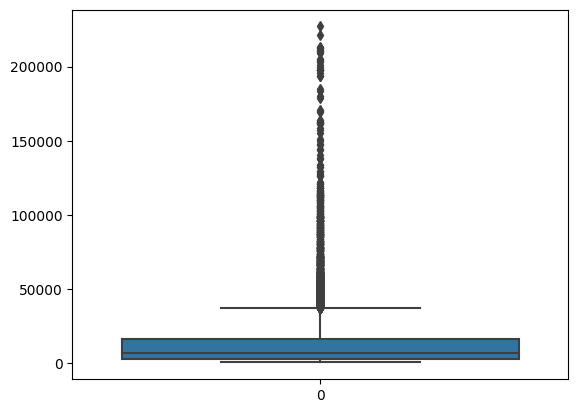

In [ ]:
sns.boxplot(data['gdp'])

In [ ]:
quart=data['gdp'].quantile(q=[0.75,0.25]).tolist()
q1=quart[1]
q3=quart[0]
Iqr=q3-q1
min=q1-1.5*Iqr
max=q3+1.5*Iqr
data['gdp']=np.where(data['gdp']>max,max,data['gdp'])

<Axes: >

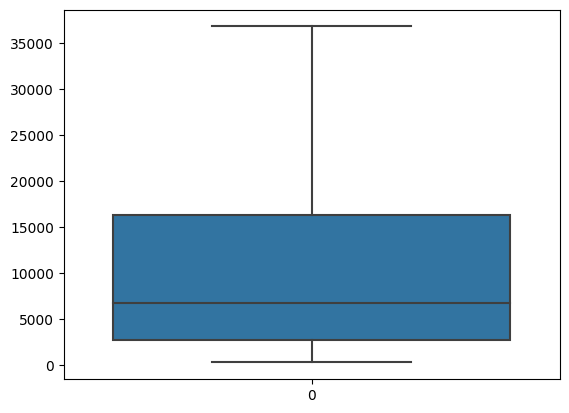

In [ ]:
sns.boxplot(data['gdp'])

<Axes: >

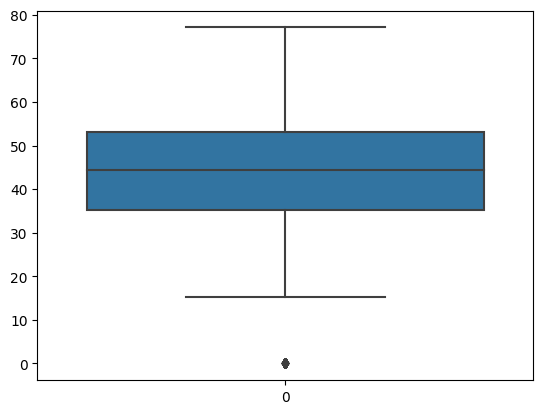

In [ ]:
sns.boxplot(data['gini'])

In [ ]:
quart=data['gini'].quantile(q=[0.75,0.25]).tolist()
q1=quart[1]
q3=quart[0]
Iqr=q3-q1
min=q1-1.5*Iqr
max=q3+1.5*Iqr
data['gini']=np.where(data['gini']>max,max,data['gini'])
data['gini']=np.where(data['gini']<min,min,data['gini'])

<Axes: >

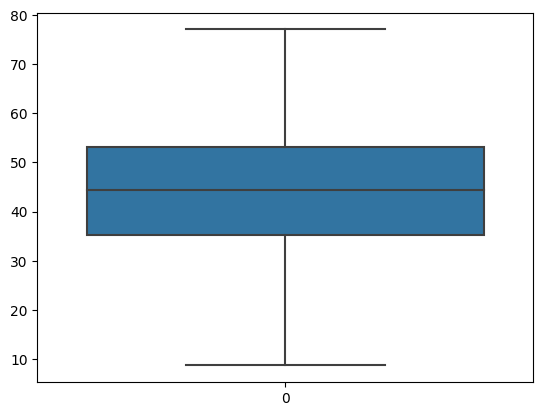

In [ ]:
sns.boxplot(data['gini'])

<Axes: >

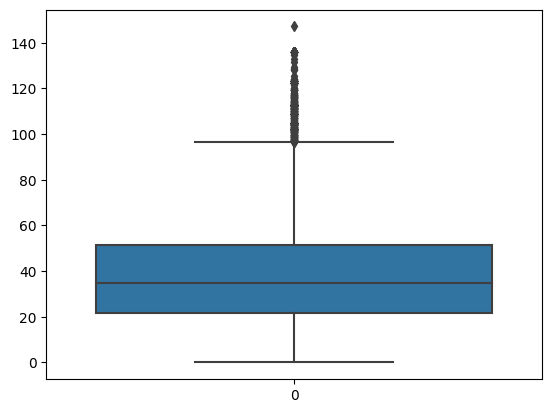

In [ ]:
sns.boxplot(data['m-theil'])

In [ ]:
quart=data['m-theil'].quantile(q=[0.75,0.25]).tolist()
q1=quart[1]
q3=quart[0]
Iqr=q3-q1
min=q1-1.5*Iqr
max=q3+1.5*Iqr
data['m-theil']=np.where(data['m-theil']>max,max,data['m-theil'])
data['m-theil']=np.where(data['m-theil']<min,min,data['m-theil'])

<Axes: >

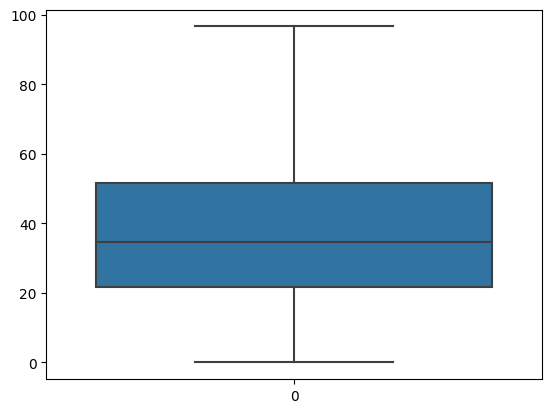

In [ ]:
sns.boxplot(data['m-theil'])

<Axes: >

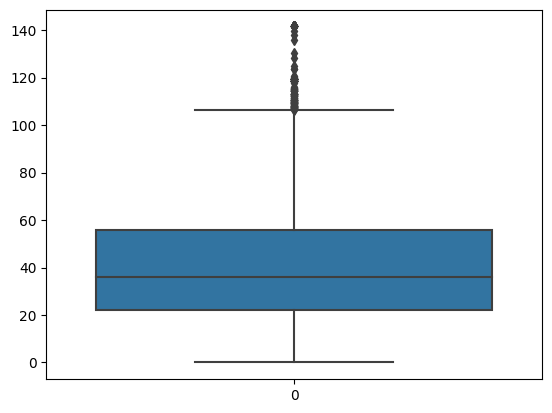

In [ ]:
sns.boxplot(data['t-theil'])

In [ ]:
quart=data['t-theil'].quantile(q=[0.75,0.25]).tolist()
q1=quart[1]
q3=quart[0]
Iqr=q3-q1
min=q1-1.5*Iqr
max=q3+1.5*Iqr
data['t-theil']=np.where(data['t-theil']>max,max,data['t-theil'])

<Axes: >

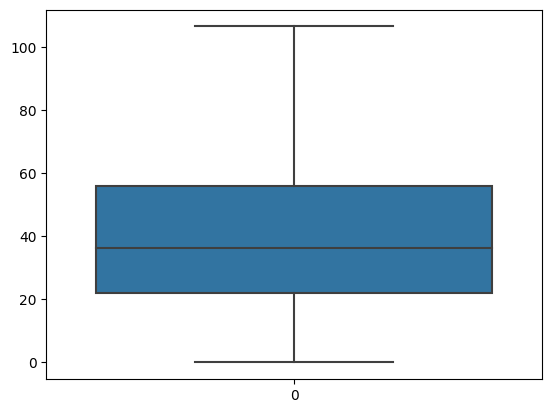

In [ ]:
sns.boxplot(data['t-theil'])

<Axes: >

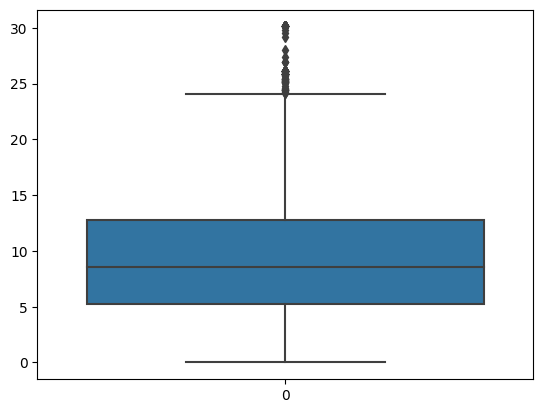

In [ ]:
sns.boxplot(data['a025'])

In [ ]:
quart=data['a025'].quantile(q=[0.75,0.25]).tolist()
q1=quart[1]
q3=quart[0]
Iqr=q3-q1
min=q1-1.5*Iqr
max=q3+1.5*Iqr
data['a025']=np.where(data['a025']>max,max,data['a025'])

<Axes: >

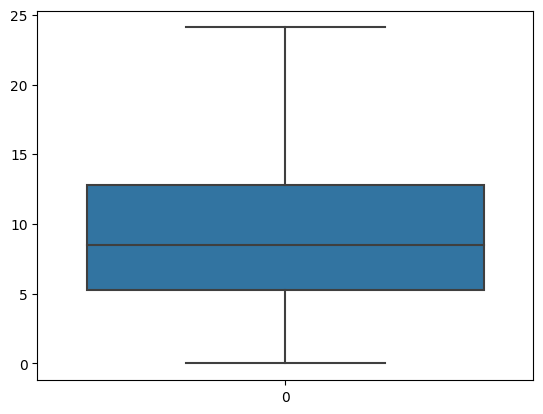

In [ ]:
sns.boxplot(data['a025'])

<Axes: >

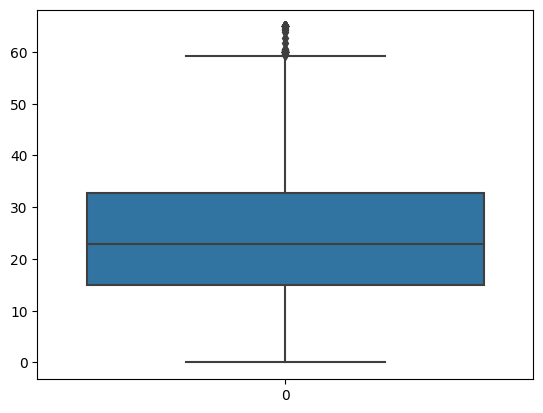

In [ ]:
sns.boxplot(data['a075'])

In [ ]:
quart=data['a075'].quantile(q=[0.75,0.25]).tolist()
q1=quart[1]
q3=quart[0]
Iqr=q3-q1
min=q1-1.5*Iqr
max=q3+1.5*Iqr
data['a075']=np.where(data['a075']>max,max,data['a075'])

<Axes: >

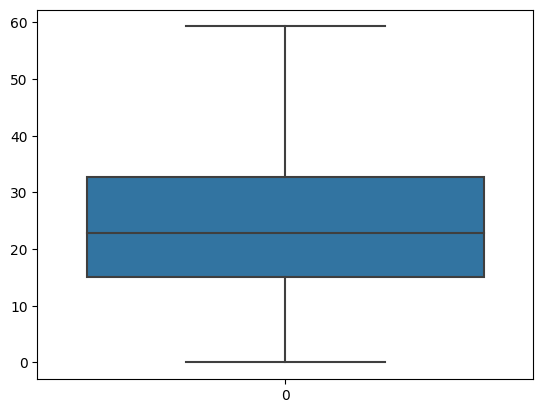

In [ ]:
sns.boxplot(data['a075'])

<Axes: >

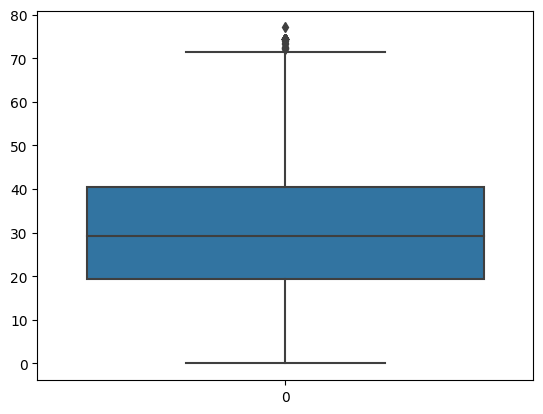

In [ ]:
sns.boxplot(data['a1'])

In [ ]:
quart=data['a1'].quantile(q=[0.75,0.25]).tolist()
q1=quart[1]
q3=quart[0]
Iqr=q3-q1
min=q1-1.5*Iqr
max=q3+1.5*Iqr
data['a1']=np.where(data['a1']>max,max,data['a1'])

<Axes: >

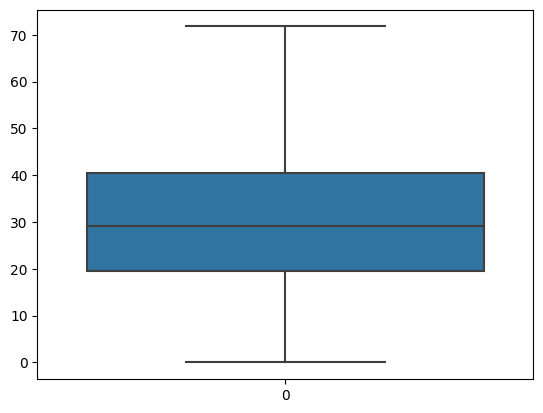

In [ ]:
sns.boxplot(data['a1'])

<Axes: >

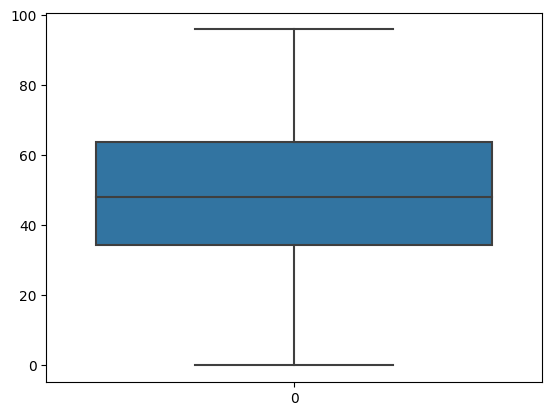

In [ ]:
sns.boxplot(data['a2'])

In [ ]:
quart=data['a2'].quantile(q=[0.75,0.25]).tolist()
q1=quart[1]
q3=quart[0]
Iqr=q3-q1
min=q1-1.5*Iqr
max=q3+1.5*Iqr
data['q2']=np.where(data['a2']>max,max,data['a2'])

<Axes: >

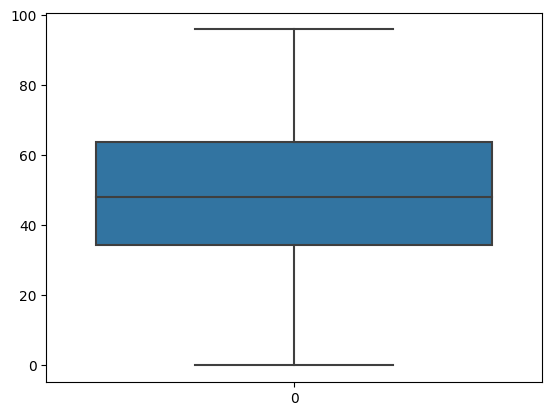

In [ ]:
sns.boxplot(data['a2'])

<Axes: >

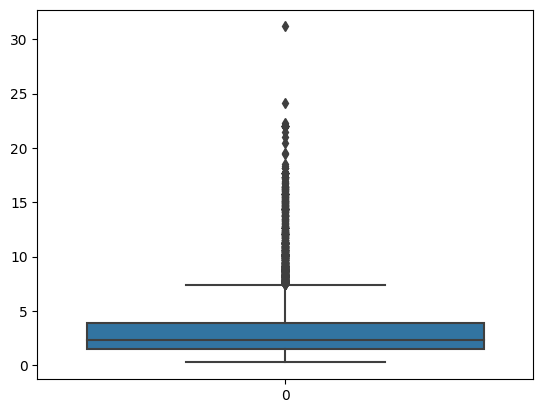

In [ ]:
sns.boxplot(data['palma'])

In [ ]:
quart=data['palma'].quantile(q=[0.75,0.25]).tolist()
q1=quart[1]
q3=quart[0]
Iqr=q3-q1
min=q1-1.5*Iqr
max=q3+1.5*Iqr
data['palma']=np.where(data['palma']>max,max,data['palma'])

<Axes: >

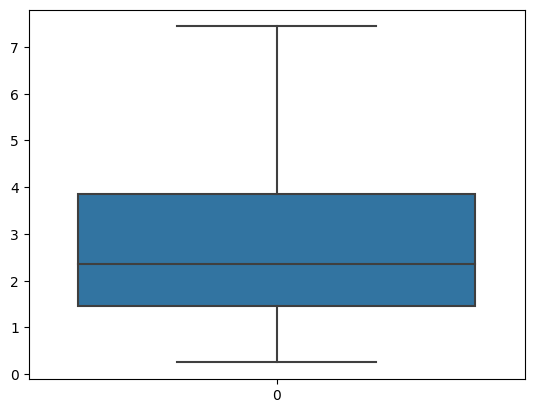

In [ ]:
sns.boxplot(data['palma'])

<Axes: >

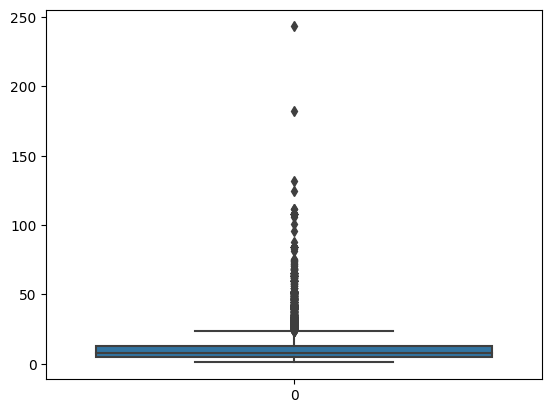

In [ ]:
sns.boxplot(data['ratio_top80bottom20'])

In [ ]:
quart=data['ratio_top80bottom20'].quantile(q=[0.75,0.25]).tolist()
q1=quart[1]
q3=quart[0]
Iqr=q3-q1
min=q1-1.5*Iqr
max=q3+1.5*Iqr
data['ratio_top80bottom20']=np.where(data['ratio_top80bottom20']>max,max,data['ratio_top80bottom20'])

<Axes: >

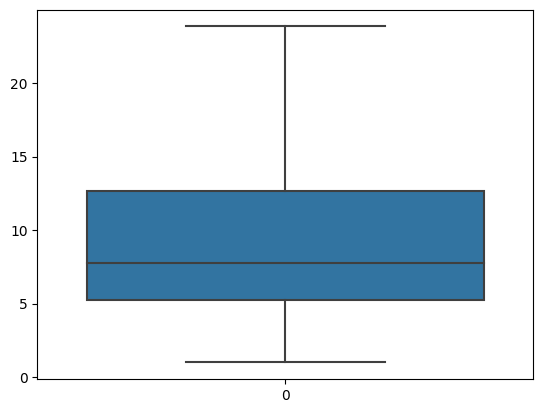

In [ ]:

sns.boxplot(data['ratio_top80bottom20'])

<Axes: >

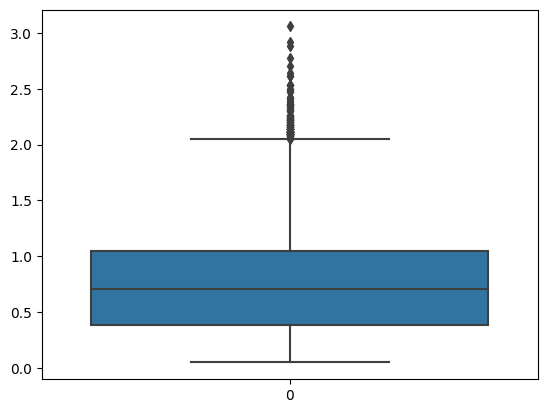

In [ ]:
sns.boxplot(data['bottom5'])

In [ ]:
quart=data['bottom5'].quantile(q=[0.75,0.25]).tolist()
q1=quart[1]
q3=quart[0]
Iqr=q3-q1
min=q1-1.5*Iqr
max=q3+1.5*Iqr
data['bottom5']=np.where(data['bottom5']>max,max,data['bottom5'])

<Axes: >

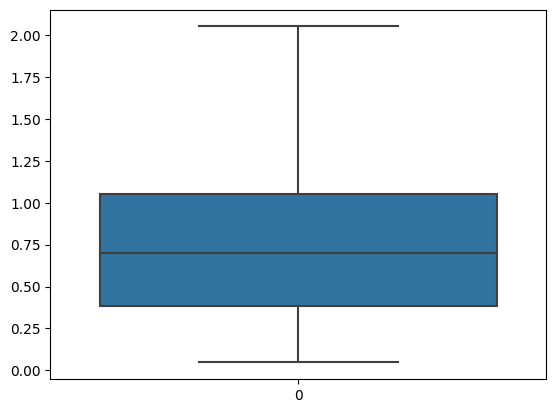

In [ ]:
sns.boxplot(data['bottom5'])

<Axes: >

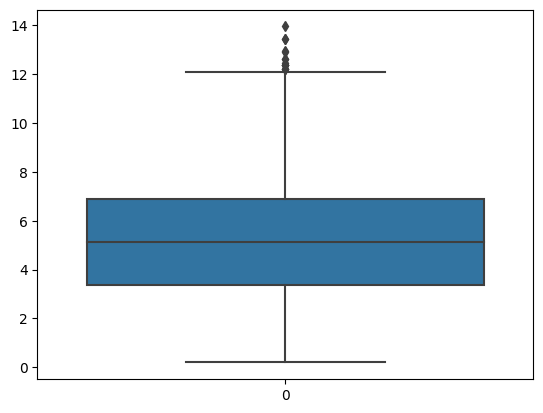

In [ ]:
sns.boxplot(data['bottom20'])

In [ ]:
quart=data['bottom20'].quantile(q=[0.75,0.25]).tolist()
q1=quart[1]
q3=quart[0]
Iqr=q3-q1
min=q1-1.5*Iqr
max=q3+1.5*Iqr
data['bottom20']=np.where(data['bottom20']>max,max,data['bottom20'])

<Axes: >

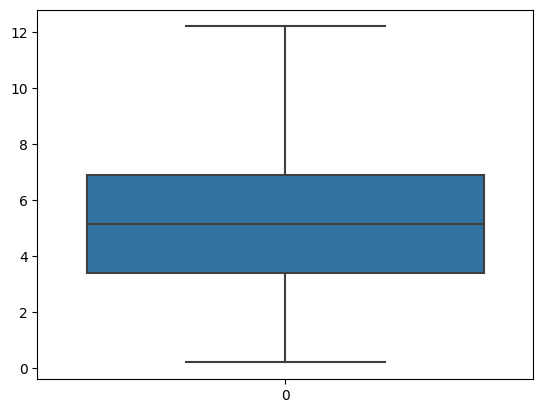

In [ ]:
sns.boxplot(data['bottom20'])

<Axes: >

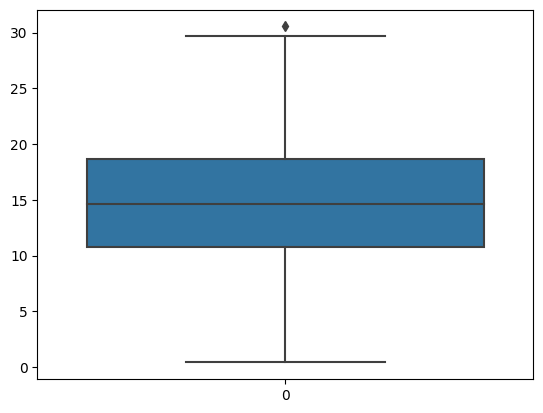

In [ ]:
sns.boxplot(data['bottom40'])

In [ ]:
quart=data['bottom40'].quantile(q=[0.75,0.25]).tolist()
q1=quart[1]
q3=quart[0]
Iqr=q3-q1
min=q1-1.5*Iqr
max=q3+1.5*Iqr
data['bottom40']=np.where(data['bottom40']>max,max,data['bottom40'])

<Axes: >

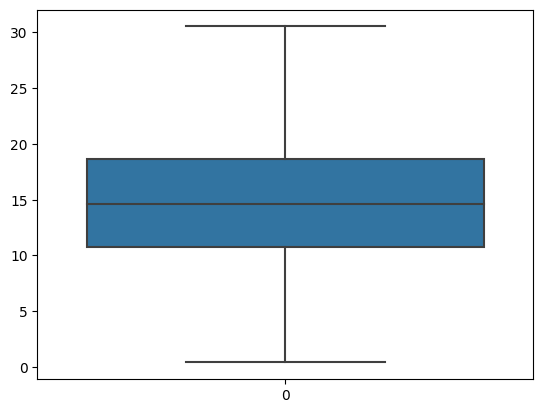

In [ ]:
sns.boxplot(data['bottom40'])

<Axes: >

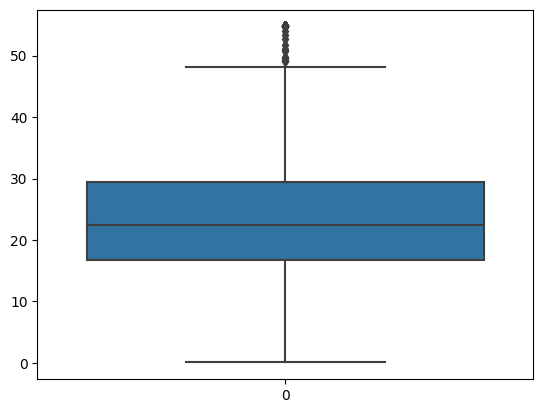

In [ ]:
sns.boxplot(data['top5'])

In [ ]:
quart=data['top5'].quantile(q=[0.75,0.25]).tolist()
q1=quart[1]
q3=quart[0]
Iqr=q3-q1
min=q1-1.5*Iqr
max=q3+1.5*Iqr
data['top5']=np.where(data['top5']>max,max,data['top5'])

<Axes: >

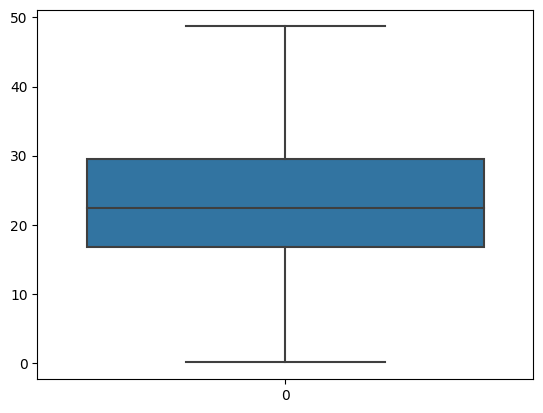

In [ ]:
sns.boxplot(data['top5'])

<Axes: >

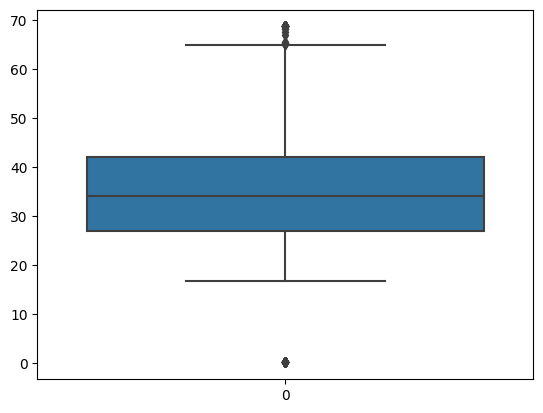

In [ ]:
sns.boxplot(data['top10'])

In [ ]:
quart=data['top10'].quantile(q=[0.75,0.25]).tolist()
q1=quart[1]
q3=quart[0]
Iqr=q3-q1
min=q1-1.5*Iqr
max=q3+1.5*Iqr
data['top10']=np.where(data['top10']>max,max,data['top10'])
data['top10']=np.where(data['top10']<min,min,data['top10'])

<Axes: >

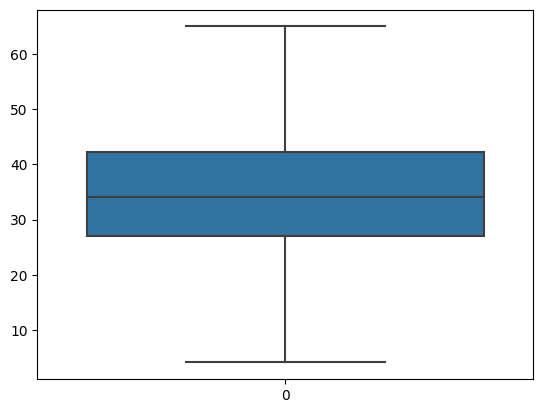

In [ ]:
sns.boxplot(data['top10'])

<Axes: >

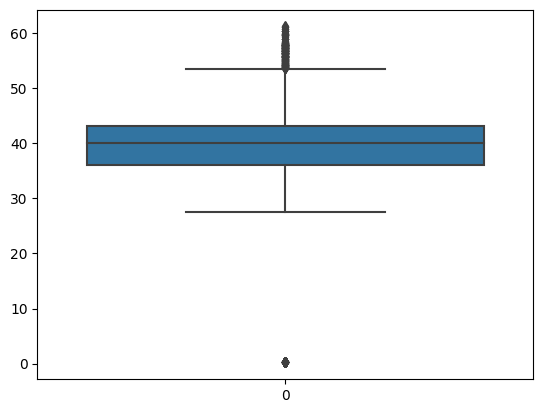

In [ ]:
sns.boxplot(data['top20'])

In [ ]:
quart=data['top20'].quantile(q=[0.75,0.25]).tolist()
q1=quart[1]
q3=quart[0]
Iqr=q3-q1
min=q1-1.5*Iqr
max=q3+1.5*Iqr
data['top20']=np.where(data['top20']>max,max,data['top20'])
data['top20']=np.where(data['top20']<min,min,data['top20'])

<Axes: >

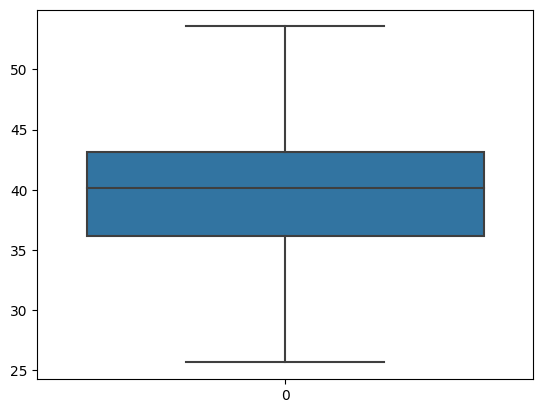

In [ ]:
sns.boxplot(data['top20'])

Splitting the data as training set and testing set

In [ ]:
X = data.drop('gini', axis=1)  # Features
y = data['gini']  # Target variable

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


X = data.drop('gini', axis=1)  # Features
y = data['gini']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Data Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Min-Max Scaling (Normalization)
min_max_scaler = MinMaxScaler()
X_train_normalized = min_max_scaler.fit_transform(X_train)
X_test_normalized = min_max_scaler.transform(X_test)

# Standardization
standard_scaler = StandardScaler()
X_train_standardized = standard_scaler.fit_transform(X_train)
X_test_standardized = standard_scaler.transform(X_test)

Mean Squared Error: 0.0316698272813388
R-squared: 0.9997746497712933
[46.292 41.241 51.451 ... 48.93  42.52  40.623]


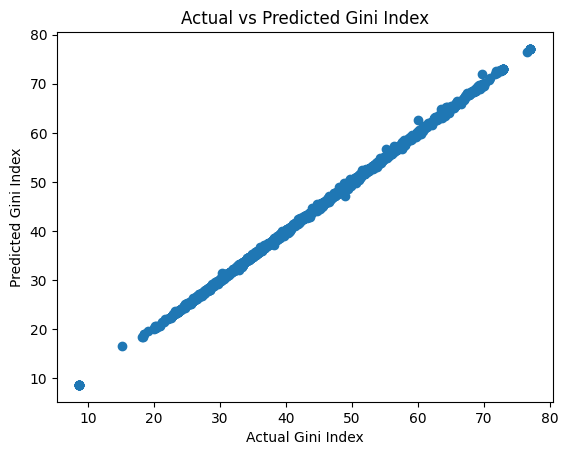

In [ ]:
model_dt = DecisionTreeRegressor(random_state=42)

# Train the model
model_dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_dt.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualize the predicted vs actual values
print(y_pred)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Gini Index")
plt.ylabel("Predicted Gini Index")
plt.title("Actual vs Predicted Gini Index")
plt.show()

Prediction using random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model (optional)
print(y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


[46.292   40.89839 51.39174 ... 48.7142  42.52    40.623  ]
Mean Squared Error: 0.01608107744477404


In [ ]:
X_train

year  population        gdp  m-theil   t-theil     a025    a050  \
11763  1998.0   5581767.0   3028.930   34.891   37.1480   8.7560  16.510   
1528   1987.0   3124892.0   4719.180   19.225   18.0580   4.4720   8.870   
6250   1952.0    552569.0    810.430   96.584   85.5620  19.8880  37.236   
10353  2008.0   3296237.0   4821.040   49.930   54.0640  12.3950  22.818   
8267   1981.0     42963.0   9209.940   40.966   41.9010   9.8890  18.690   
...       ...         ...        ...      ...       ...      ...     ...   
13631  2020.0  10099270.0  36784.825   14.854   14.7310   3.6110   7.096   
5603   2015.0   5481128.0  36784.825   12.200   12.6530   3.0820   6.013   
1002   1958.0  46306846.5   1851.490   66.235   66.5750  15.2490  28.029   
16008  1983.0   8254746.0   4224.390   96.584  106.5475  24.0925  45.614   
7483   1978.0    224146.0  27909.900   12.063   12.6770   3.0730   5.973   

         a075      a1      a2   palma  ratio_top80bottom20  bottom5  bottom20  \
11763  23.371  29.454  47.942  2.4610               8.2440    0.762     4.975   
1528   13.207  17.490  34.028  1.2620               5.2550    0.931     6.717   
6250   52.677  66.367  93.592  7.4385              23.8475    0.050     0.555   
10353  31.672  39.304  61.788  3.7280              11.9190    0.392     3.484   
8267   26.549  33.613  56.067  2.8360              10.0880    0.484     4.152   
...       ...     ...     ...     ...                  ...      ...       ...   
13631  10.485  13.803  26.748  1.0420               4.0280    1.171     8.223   
5603    8.808  11.485  21.274  0.9610               3.4700    1.591     9.362   
1002   38.886  48.436  82.232  5.2450              18.2740    0.212     2.592   
16008  59.263  70.822  91.239  7.4385              23.8475    0.055     0.701   
7483    8.727  11.364  21.183  0.9480               3.3650    1.501     9.521   

       bottom40    top5   top10   top20      q2  
11763    14.161  23.096  34.846  41.016  47.942  
1528     19.259  14.505  24.304  35.295  34.028  
6250      4.934  37.254  50.706  46.733  93.592  
10353    11.057  29.474  41.216  41.520  61.788  
8267     12.803  24.382  36.312  41.884  56.067  
...         ...     ...     ...     ...     ...  
13631    22.072  14.300  23.009  33.118  26.748  
5603     23.293  13.663  22.377  32.491  21.274  
1002      8.902  32.210  46.689  47.368  82.232  
16008     3.511  48.111  62.127  45.718  91.239  
7483     23.860  14.128  22.617  32.041  21.183  

[12666 rows x 19 columns]

In [ ]:
y_train.head(11764)

11763    45.165
1528     32.926
6250     65.140
10353    52.337
8267     47.807
          ...  
14056    52.571
14183    42.693
9655     44.343
14200    32.592
5561     27.103
Name: gini, Length: 11764, dtype: float64

In [ ]:
model_dt.predict([[1998.0,	30.5355,	3028.930,	34.891,	37.1480,	8.7560,	16.510,	23.371,	29.454,	47.942,	2.4610,	8.2440,	0.762,	4.975,	14.161,	23.096,	34.846,	41.016,	47.942]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([45.165])

In [ ]:
y_train.head(1528)

11763    45.165
1528     32.926
6250     65.140
10353    52.337
8267     47.807
          ...  
10568    57.539
6946     33.133
12752    43.487
8653     50.197
5545     33.193
Name: gini, Length: 1528, dtype: float64

In [ ]:
model_dt.predict([[1987.0,	3124892.0,	4719.180,	19.225,	18.0580, 4.4720,	8.870,	13.207,	17.490,	34.028,	1.2620,	5.2550,	0.931,	6.717,	19.259,	14.505,	24.304,	35.295,	34.028]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([32.926])

In [ ]:
y_train.head(6250)

11763    45.165
1528     32.926
6250     65.140
10353    52.337
8267     47.807
          ...  
10050    36.255
10383    43.485
1986     34.337
414      40.288
13151    31.924
Name: gini, Length: 6250, dtype: float64

In [ ]:
model_dt.predict([[1952.0,	552569.0,	810.430,	96.584,	85.5620,	19.8880,	37.236,	52.677,	66.367,	93.592,	7.4385,	23.8475,	0.050,	0.555,	4.934,	37.254,	50.706,	46.733,	93.592]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([65.14])

In [ ]:
y_train.head(10353)

11763    45.165
1528     32.926
6250     65.140
10353    52.337
8267     47.807
          ...  
13610    26.887
8996     65.414
15752    41.764
3330     50.971
11341    42.908
Name: gini, Length: 10353, dtype: float64

In [ ]:
model_dt.predict([[1981.0,	42963.0,	9209.940,	40.966,	41.9010,	9.8890,	18.690,	26.549,	33.613,	56.067,	2.8360,	10.0880,	0.484,	4.152,	12.803,	24.382,	36.312,	41.884,	56.067]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([47.807])

In [ ]:
y_train.head(8267)

11763    45.165
1528     32.926
6250     65.140
10353    52.337
8267     47.807
          ...  
6306     59.359
8148     38.006
13048    32.693
1732     36.493
13170    30.228
Name: gini, Length: 8267, dtype: float64

In [ ]:
model_dt.predict([[1958.0,	46306846.5,	1851.490,	66.235,	66.5750,	15.2490,	28.029,	38.886,	48.436,	82.232,	5.2450,	18.2740,	0.212,	2.592,	8.902,	32.210,	46.689,	47.368,	82.232]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([58.094])

In [ ]:
y_train.head(1002)

11763    45.165
1528     32.926
6250     65.140
10353    52.337
8267     47.807
          ...  
7276     36.233
3591     35.725
2990     53.811
14596    45.767
570      56.863
Name: gini, Length: 1002, dtype: float64

In [ ]:
import pickle


In [ ]:
pickle.dump(model_dt,open('/content/model_saved','wb'))